# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

## Specifying filetype, and folder as before

In [33]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [34]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Medium' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split  \
0               08 KA961_c110_a1_FIA.txt           0.0    103.412210   
1               10 KA961_c110_a1_FIB.txt           0.0    103.401211   
2               14 KA961_c111_a1_FIB.txt           0.0    103.973127   
3               15 KA961_c111_a1_FIA.txt           0.0    104.127104   
4               16 KA961_c111_a1_FIC.txt           0.0    104.264583   
5   20 KA961_c113_a1_FIA_CRR_DiadFit.txt           1.0    104.055614   
6               22 KA961_c115_a1_FIA.txt           0.0    103.351718   
7   23 KA961_c150_a1_FIA_CRR_DiadFit.txt           1.0    104.132603   
8   29 KA961_c151_a1_FIA_CRR_DiadFit.txt           1.0    103.384714   
9               30 KA961_c152_a1_FIA.txt           0.0    103.379214   
10  32 KA961_c153_a1_FIB_CRR_DiadFit.txt           1.0    103.489198   
11  34 KA961_c154_a1_FIA_CRR_DiadFit.txt           1.0    103.417709   
12              36 KA961_c156_a1_FIA.txt           0.0    103.483699   
13  38 KA961_c158_a1_FIA_CRR_DiadFit.txt           1.0    103.362717   
14  39 KA961_c158_a2_FIB_CRR_DiadFit.txt           1.0    103.241735   

      Diad1_pos    Diad2_pos      HB1_pos      HB2_pos      C13_pos  \
0   1285.318773  1388.730983  1265.109261  1410.161314          NaN   
1   1285.313274  1388.714485  1265.169752  1410.183311          NaN   
2   1283.993469  1387.966596  1264.036920  1409.627893  1369.929263   
3   1283.652520  1387.779623          NaN          NaN          NaN   
4   1283.410555  1387.675139          NaN          NaN          NaN   
5   1283.894484  1387.950098  1264.031421  1409.242950          NaN   
6   1285.538741  1388.890459  1265.076266  1410.210807          NaN   
7   1283.729508  1387.862111  1263.811453  1409.649890          NaN   
8   1285.434256  1388.818970  1265.472208  1410.155815          NaN   
9   1285.538741  1388.917955  1265.290735  1410.227304          NaN   
10  1285.087807  1388.577005  1264.949785  1410.122820          NaN   
11  1285.302276  1388.719984  1265.312731  1410.133818  1368.307003   
12  1285.109804  1388.593503  1264.971782  1410.056829          NaN   
13  1285.335271  1388.697988  1264.999278  1410.084325          NaN   
14  1285.791703  1389.033438  1265.483206  1410.408777          NaN   

    Diad1_abs_prom  Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  \
0       664.058394     1229.129815  ...  784.101566         NaN   1365.183394   
1       525.473645      968.643038  ...  740.168681         NaN   1200.848645   
2      1022.391237     2234.609138  ...  796.257010  731.576862   1701.016237   
3       218.562338      481.744422  ...         NaN         NaN    888.562338   
4       217.388392      472.310325  ...         NaN         NaN    887.263392   
5       590.137753     1306.454146  ...  736.884556         NaN   1260.262753   
6       459.475851      823.245098  ...  727.276485         NaN   1131.100851   
7       485.952210     1039.602714  ...  750.576570         NaN   1185.952210   
8       511.648027      897.413238  ...  758.628383         NaN   1211.023027   
9       637.832350     1137.401290  ...  768.749365         NaN   1316.832350   
10      581.805667     1143.438921  ...  754.486201         NaN   1266.680667   
11      492.530004      923.578283  ...  743.103555  849.999000   1174.655004   
12      628.300330     1170.859447  ...  808.838768         NaN   1362.550330   
13      863.472372     1616.811744  ...  784.488050         NaN   1542.222372   
14      381.998114      723.257636  ...  741.391052         NaN   1073.373114   

    HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0   750.282021           701.125          700.7500                     NaN   
1   709.488296           675.375          674.0000                     NaN   
2   742.303889           678.625          679.2500                2.809229   
3          NaN           670.000          669.5625                     NaN   
4          NaN           669.875          669.8750     

### Now load one file from this group to tweak parameters for

In [35]:
Diad_Files =GroupN_df['filename']
i=4


### Lets plot the diad to have a look at it

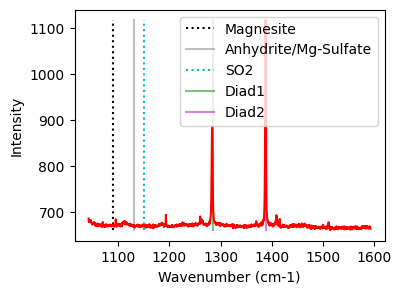

In [36]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [37]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [38]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=217.38839154755715, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.295425       1285.295425        0.005102       1286.235502   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           0.700495                  0             685.276786   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        4.057133        0.637421    1.400989  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.069712      1.098566                   0.097665   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.002044  PseudoVoigtModel

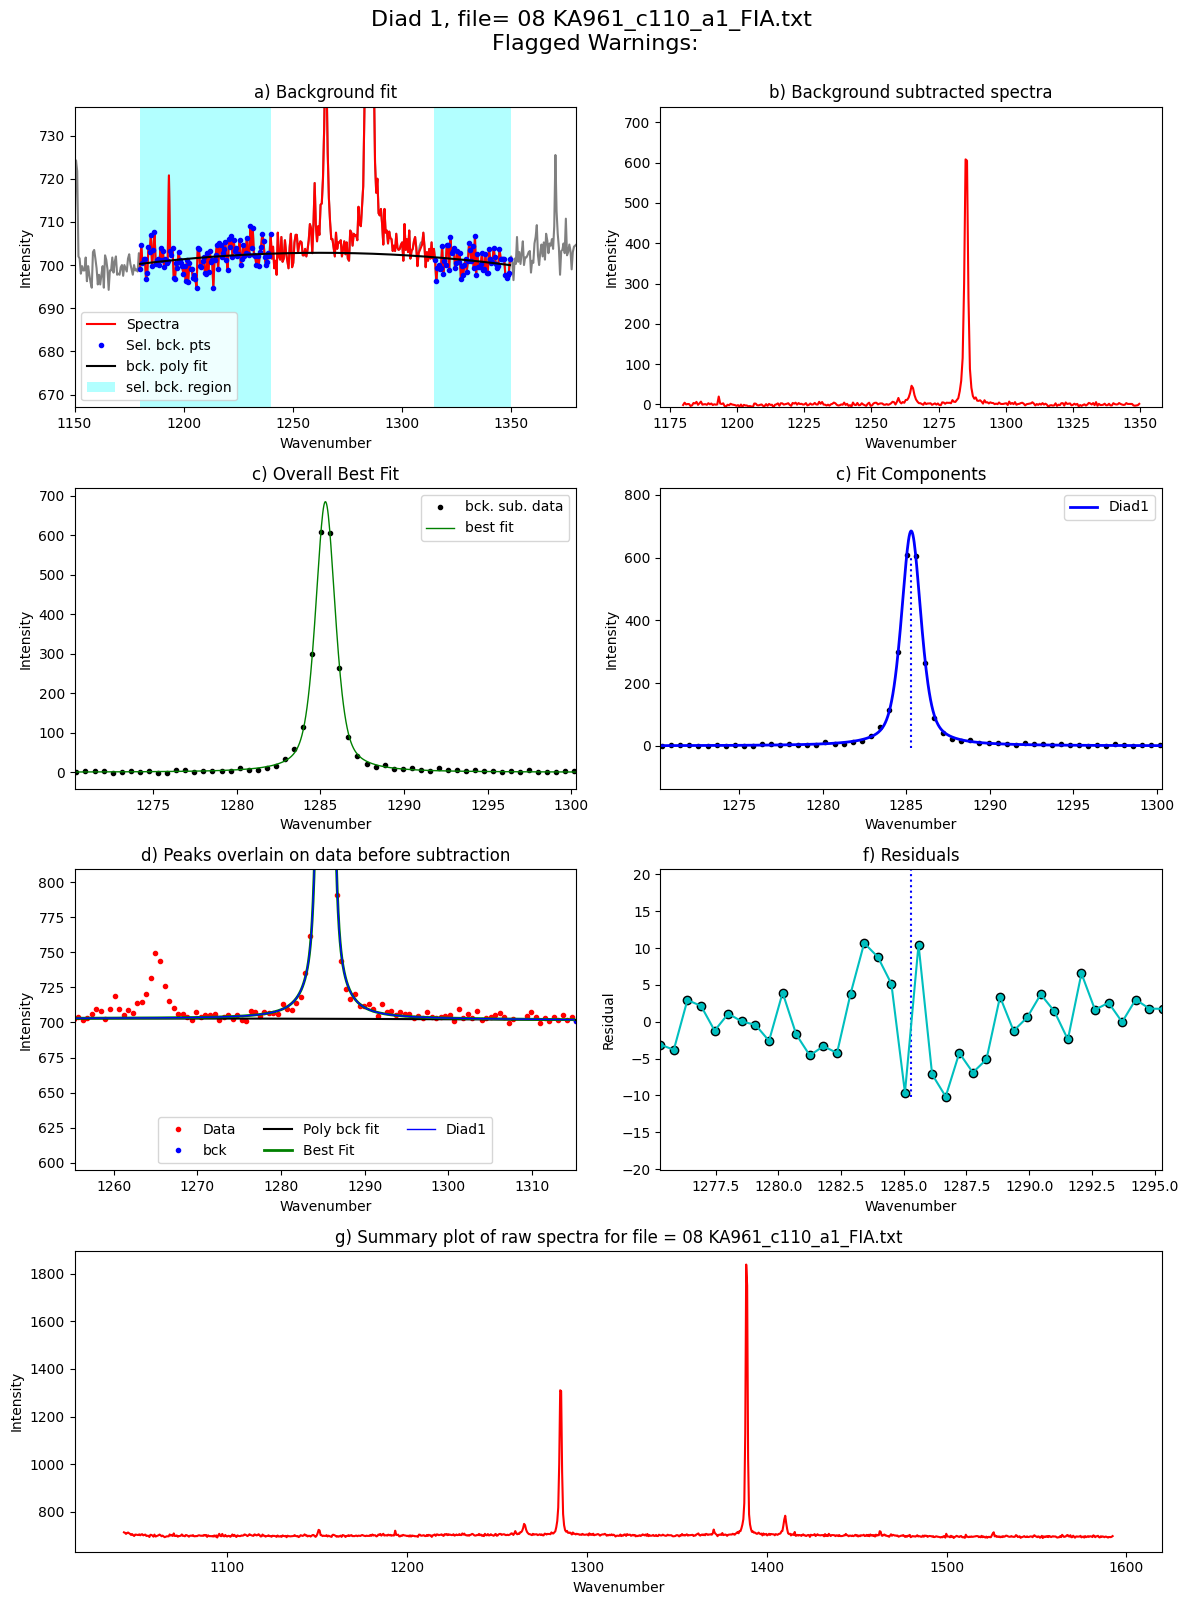

In [39]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [40]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [41]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=False, gauss_amp=nan, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=472.3103249644814, HB_prom=nan, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.673524       1387.673524        0.005693       1093.230798   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Diad2_Combofit_Height  \
0           0.787191                  0             485.982193   

   Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  \
0        3.117866        0.791122    1.574381  Flagged Warnings:   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.004219      1.050228                   0.006643   

   Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0               0.00324  PseudoVoigtModel

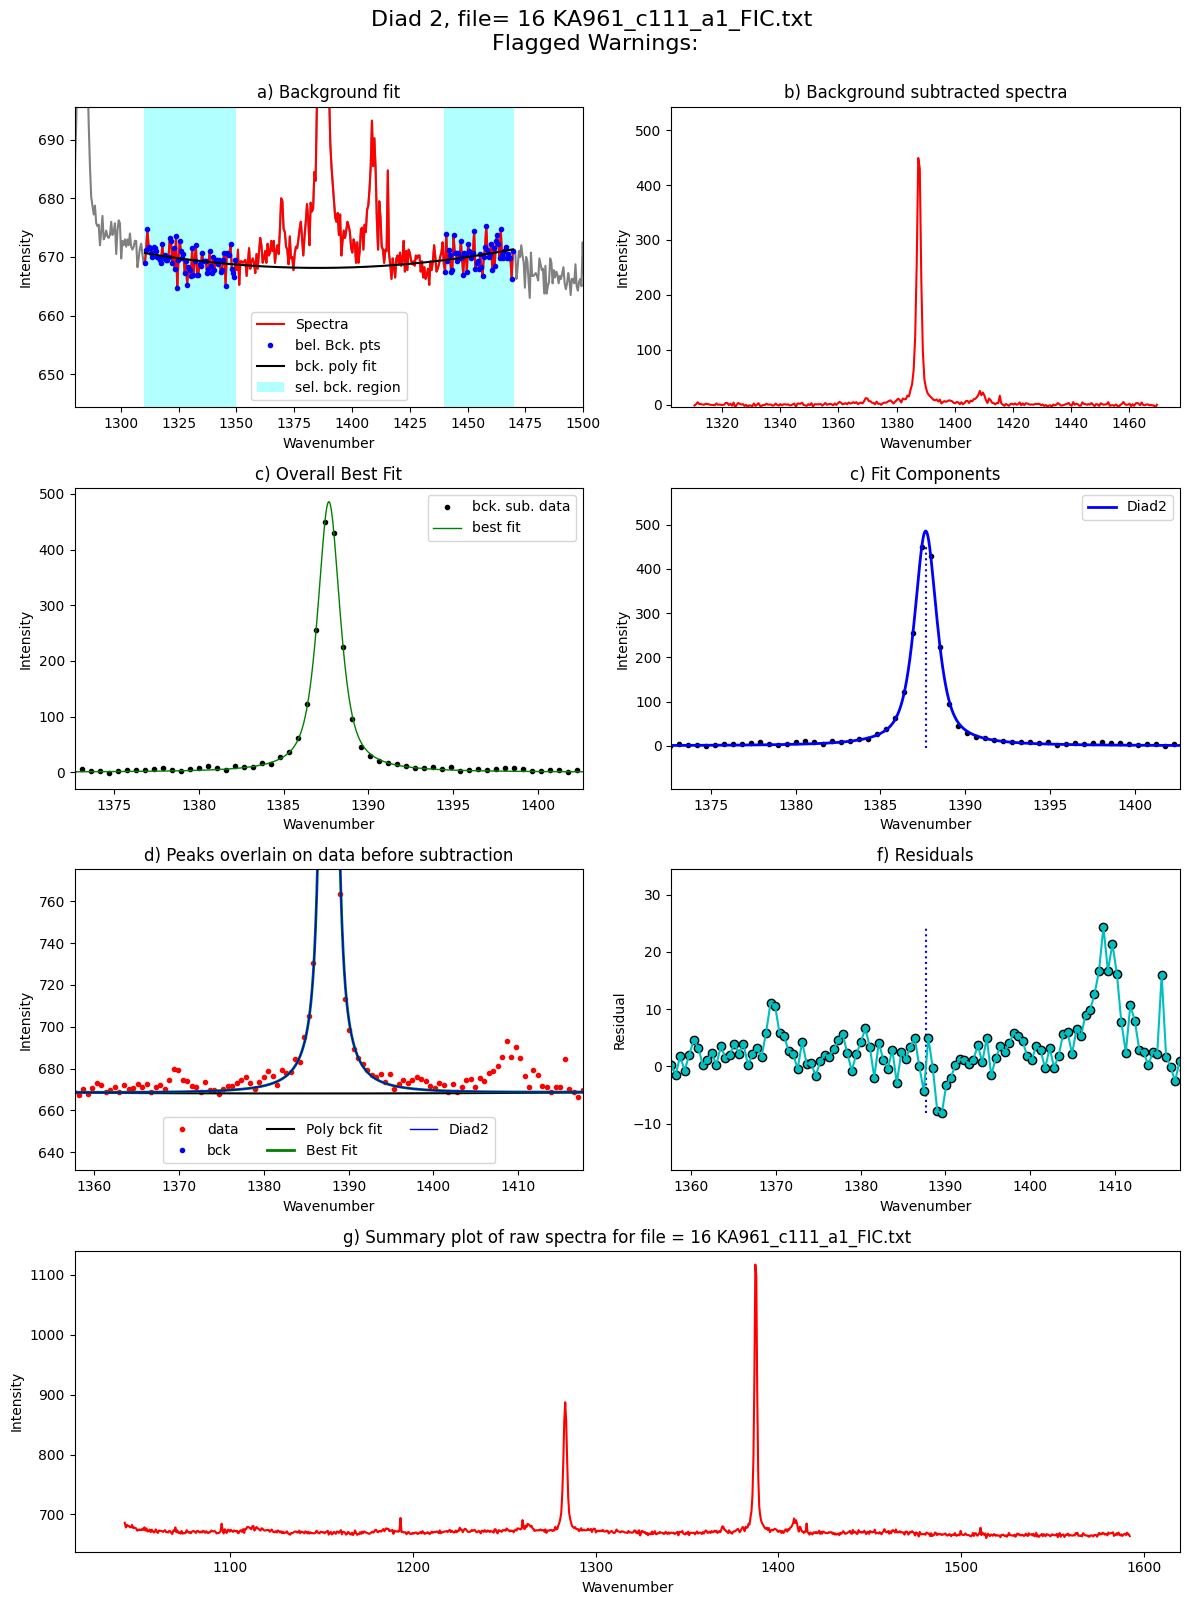

In [42]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/15 [00:00<?, ?it/s]

Processing file: 08 KA961_c110_a1_FIA.txt


  7%|▋         | 1/15 [00:02<00:31,  2.27s/it]

Processing file: 10 KA961_c110_a1_FIB.txt


 13%|█▎        | 2/15 [00:04<00:30,  2.32s/it]

Processing file: 14 KA961_c111_a1_FIB.txt
refit attempt 1


 20%|██        | 3/15 [00:07<00:31,  2.59s/it]

Processing file: 15 KA961_c111_a1_FIA.txt


 27%|██▋       | 4/15 [00:09<00:26,  2.41s/it]

Processing file: 16 KA961_c111_a1_FIC.txt


 33%|███▎      | 5/15 [00:11<00:23,  2.33s/it]

Processing file: 20 KA961_c113_a1_FIA_CRR_DiadFit.txt


 40%|████      | 6/15 [00:14<00:20,  2.33s/it]

Processing file: 22 KA961_c115_a1_FIA.txt


 47%|████▋     | 7/15 [00:16<00:18,  2.29s/it]

Processing file: 23 KA961_c150_a1_FIA_CRR_DiadFit.txt


 53%|█████▎    | 8/15 [00:18<00:16,  2.36s/it]

Processing file: 29 KA961_c151_a1_FIA_CRR_DiadFit.txt


 60%|██████    | 9/15 [00:21<00:13,  2.30s/it]

Processing file: 30 KA961_c152_a1_FIA.txt


 67%|██████▋   | 10/15 [00:23<00:11,  2.36s/it]c:\users\charl\documents\python dev\diadfit\src\DiadFit\diads.py:3218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))


Processing file: 32 KA961_c153_a1_FIB_CRR_DiadFit.txt


 73%|███████▎  | 11/15 [00:25<00:09,  2.36s/it]

Processing file: 34 KA961_c154_a1_FIA_CRR_DiadFit.txt


 80%|████████  | 12/15 [00:34<00:12,  4.28s/it]

Processing file: 36 KA961_c156_a1_FIA.txt


 87%|████████▋ | 13/15 [00:37<00:07,  3.93s/it]

Processing file: 38 KA961_c158_a1_FIA_CRR_DiadFit.txt


 93%|█████████▎| 14/15 [00:39<00:03,  3.41s/it]

Processing file: 39 KA961_c158_a2_FIB_CRR_DiadFit.txt


100%|██████████| 15/15 [00:42<00:00,  2.87s/it]


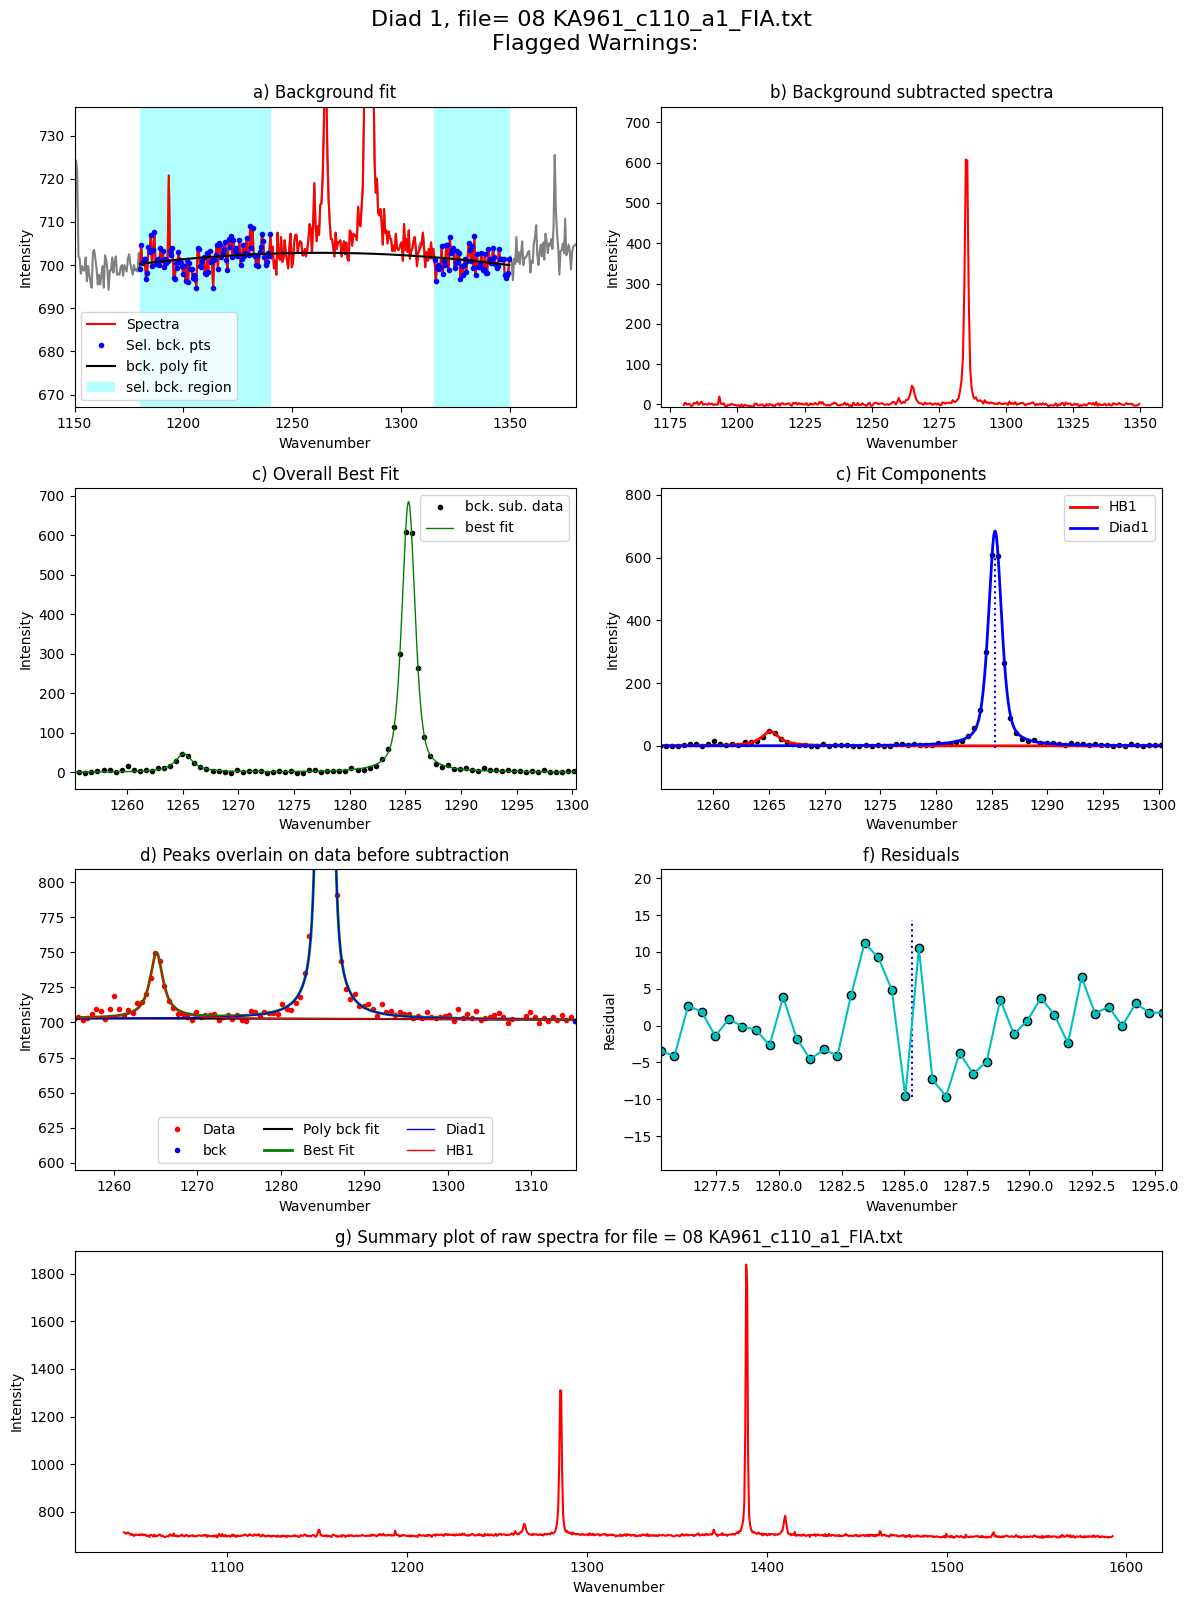

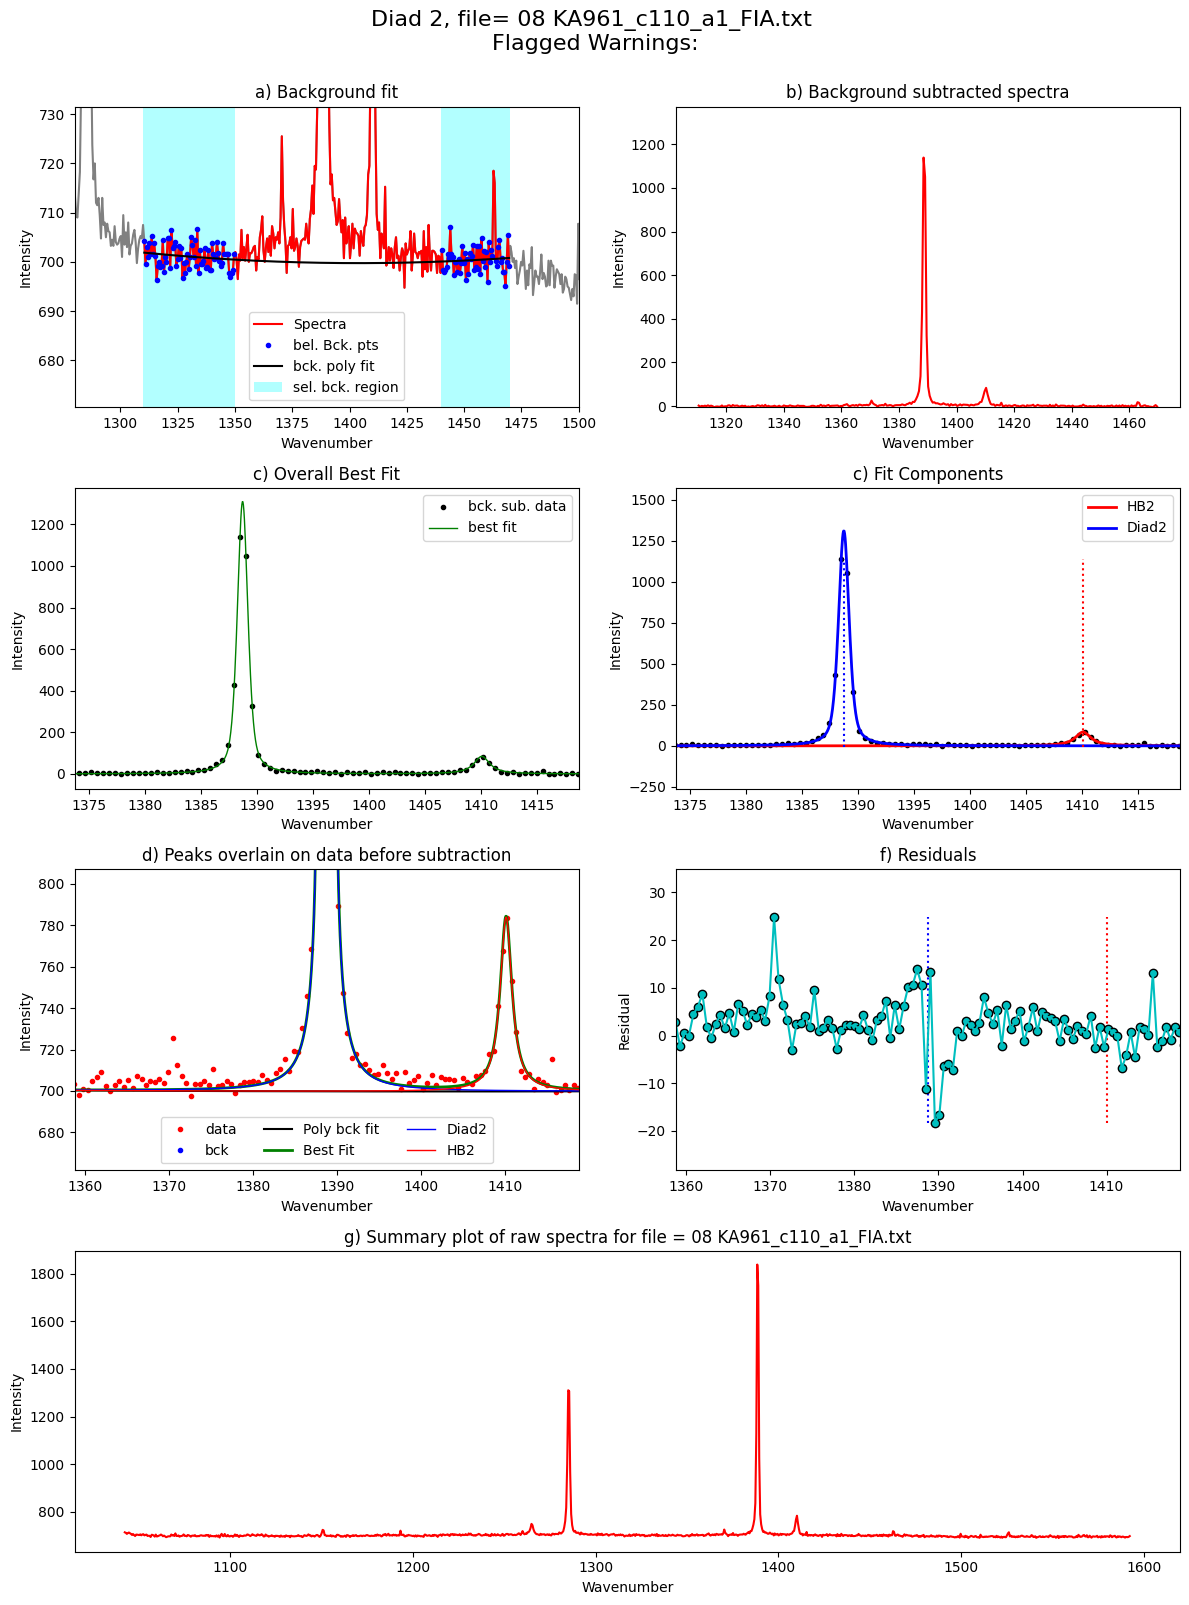

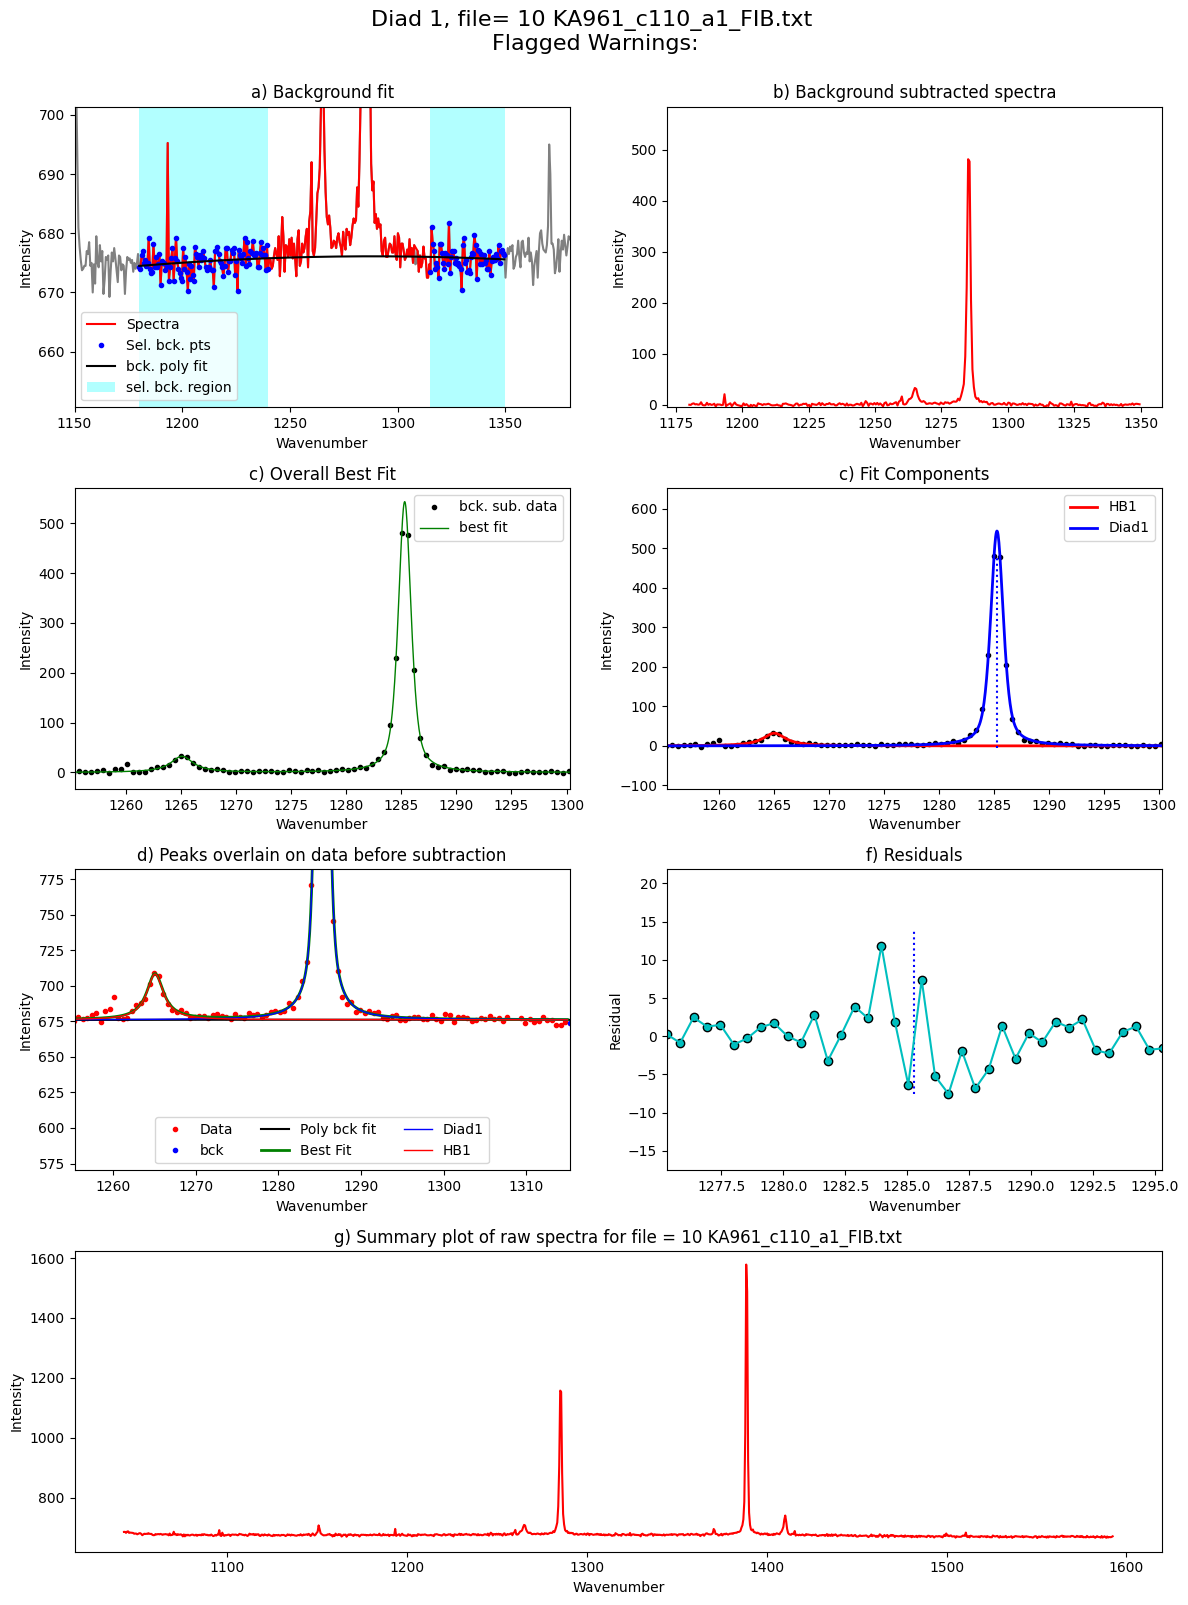

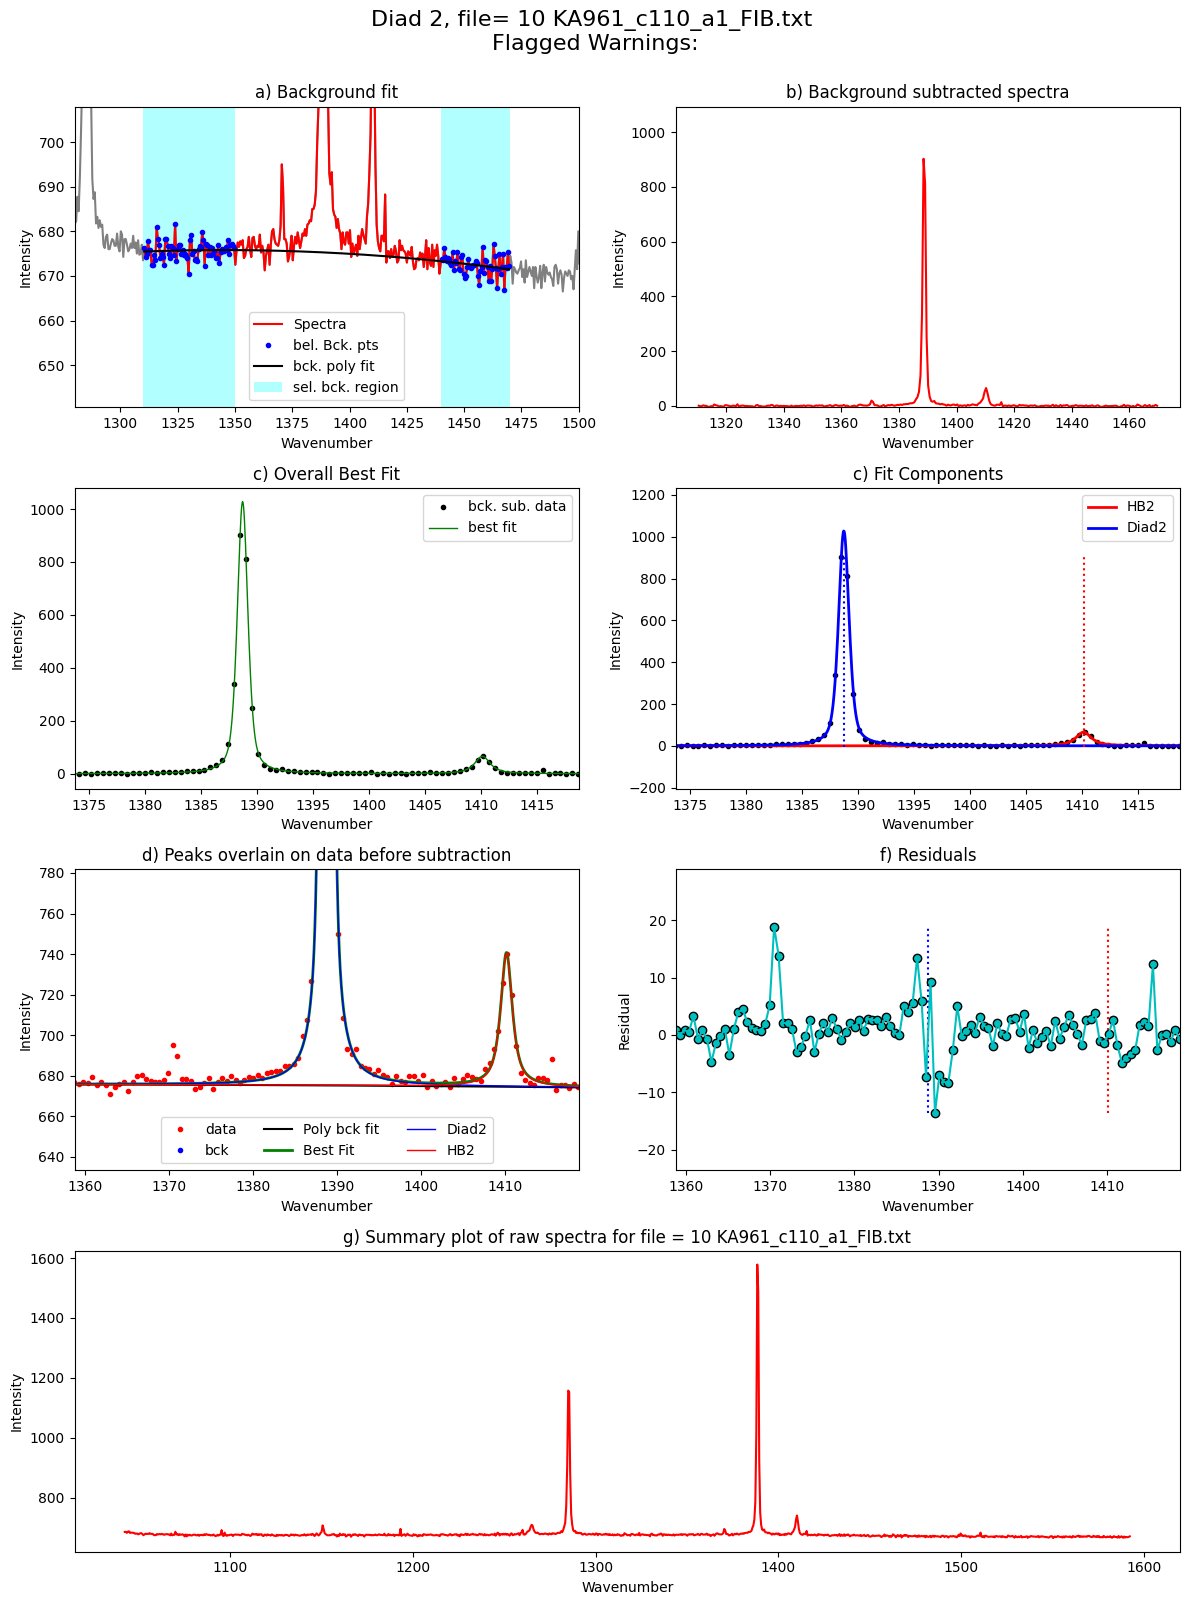

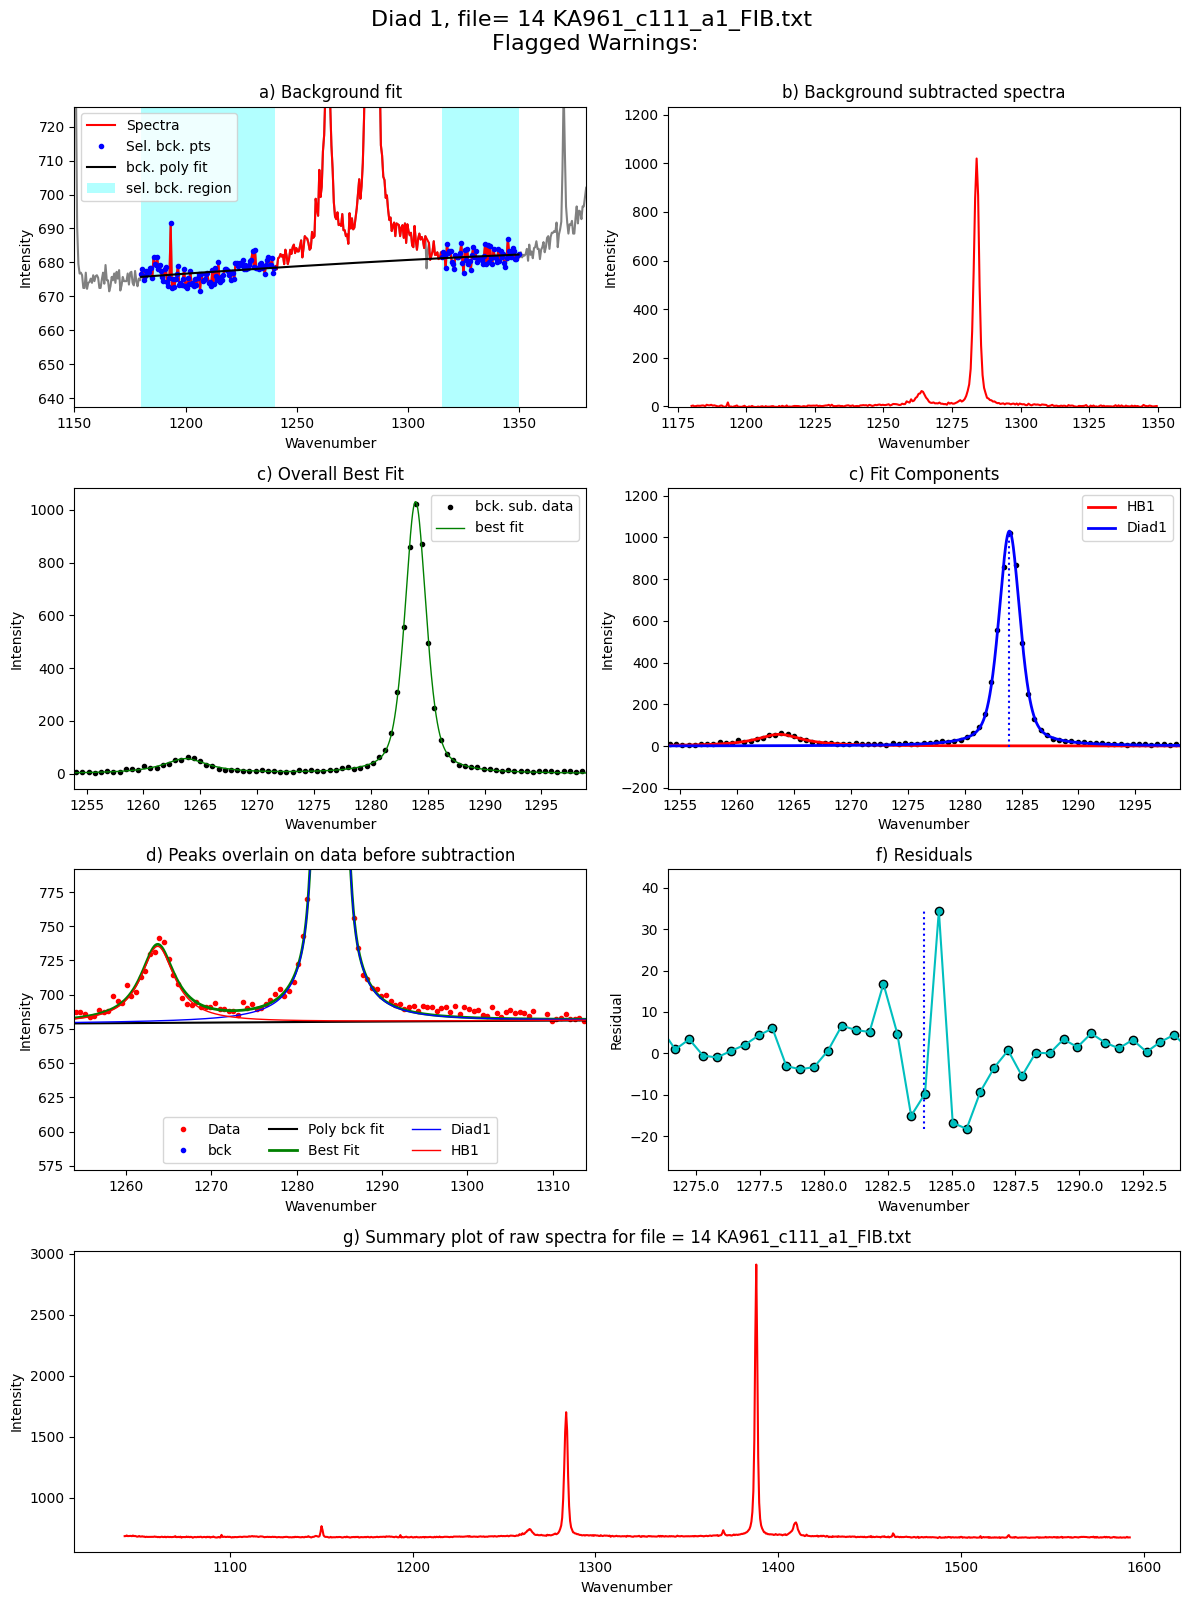

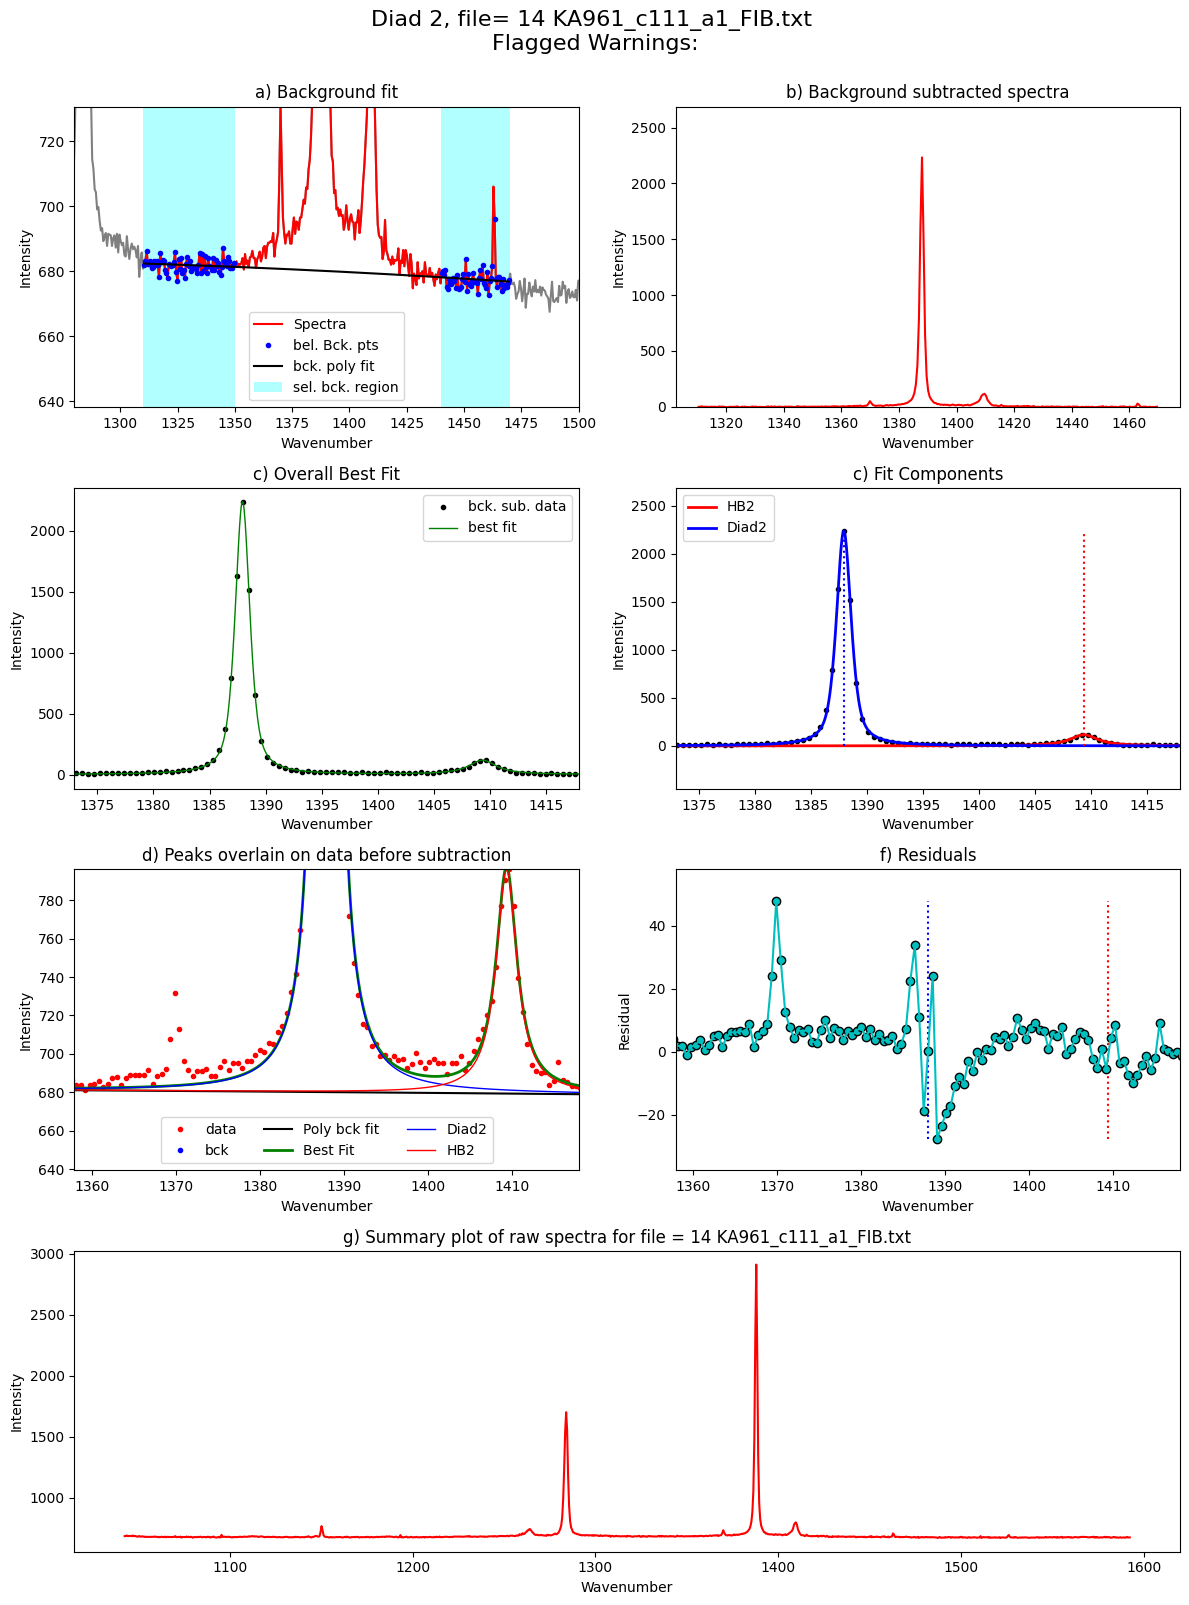

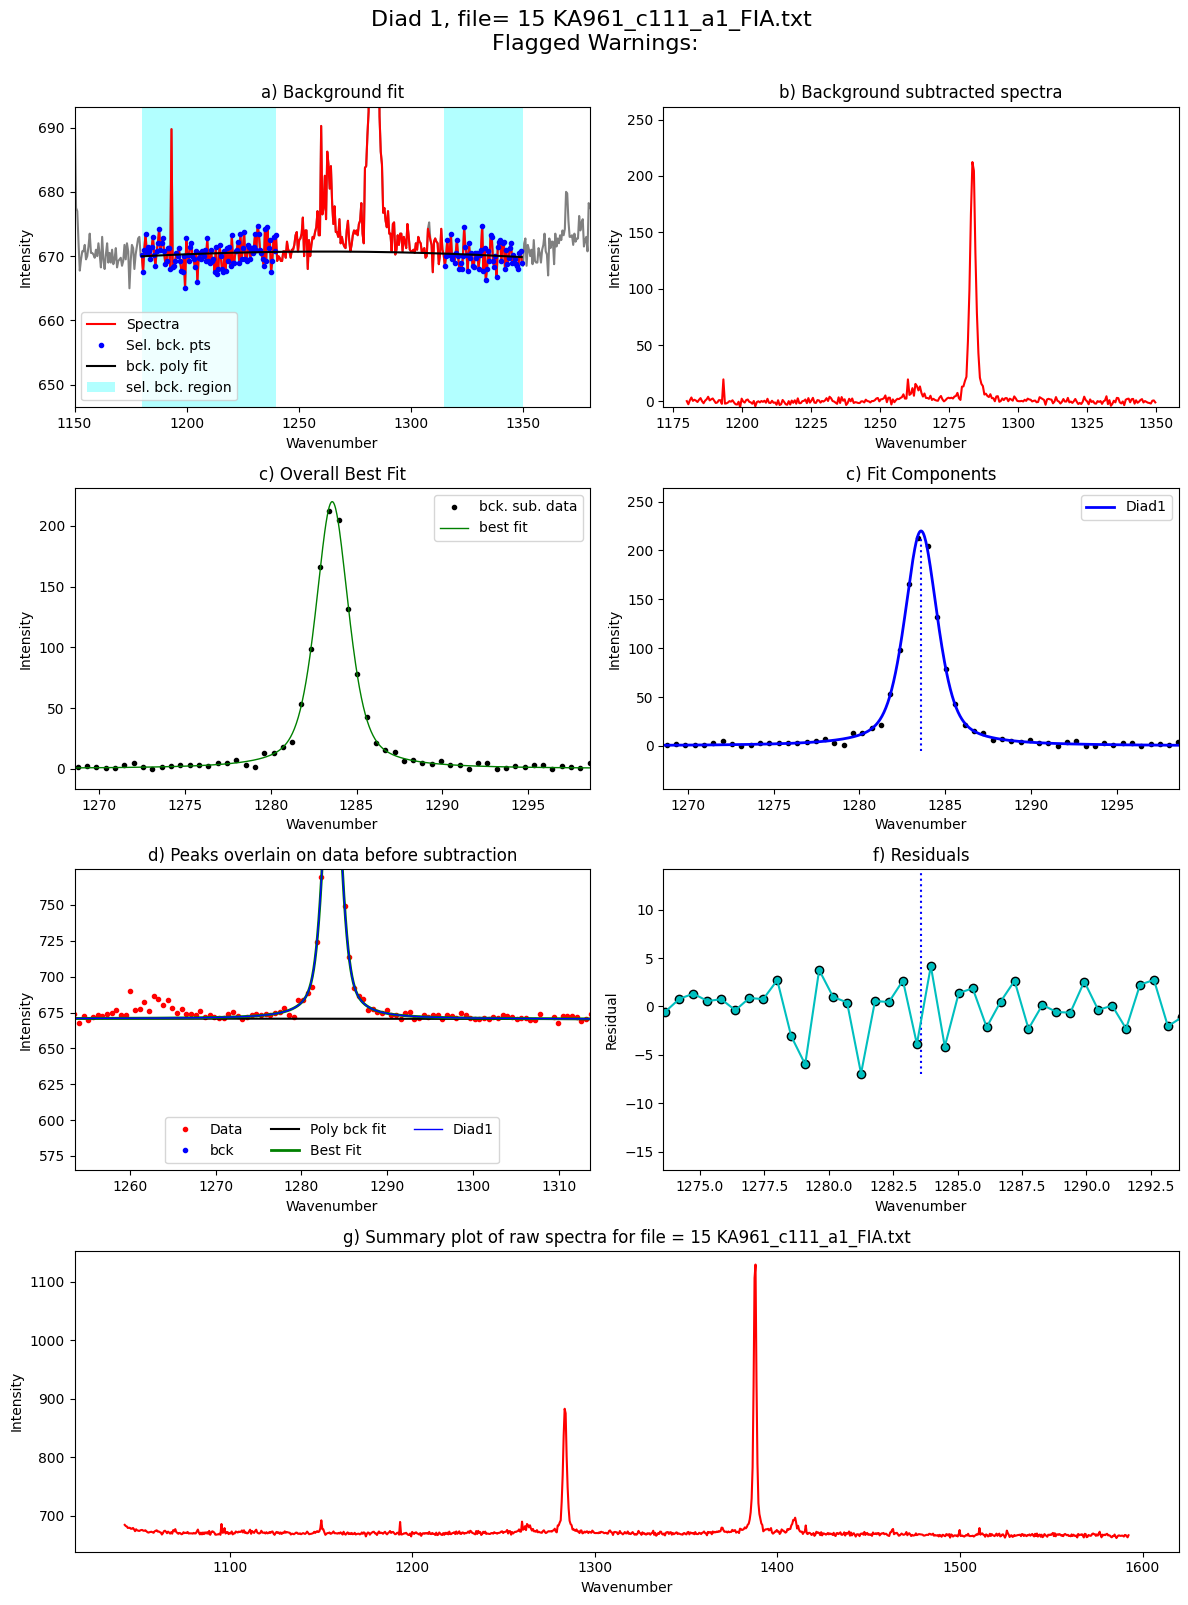

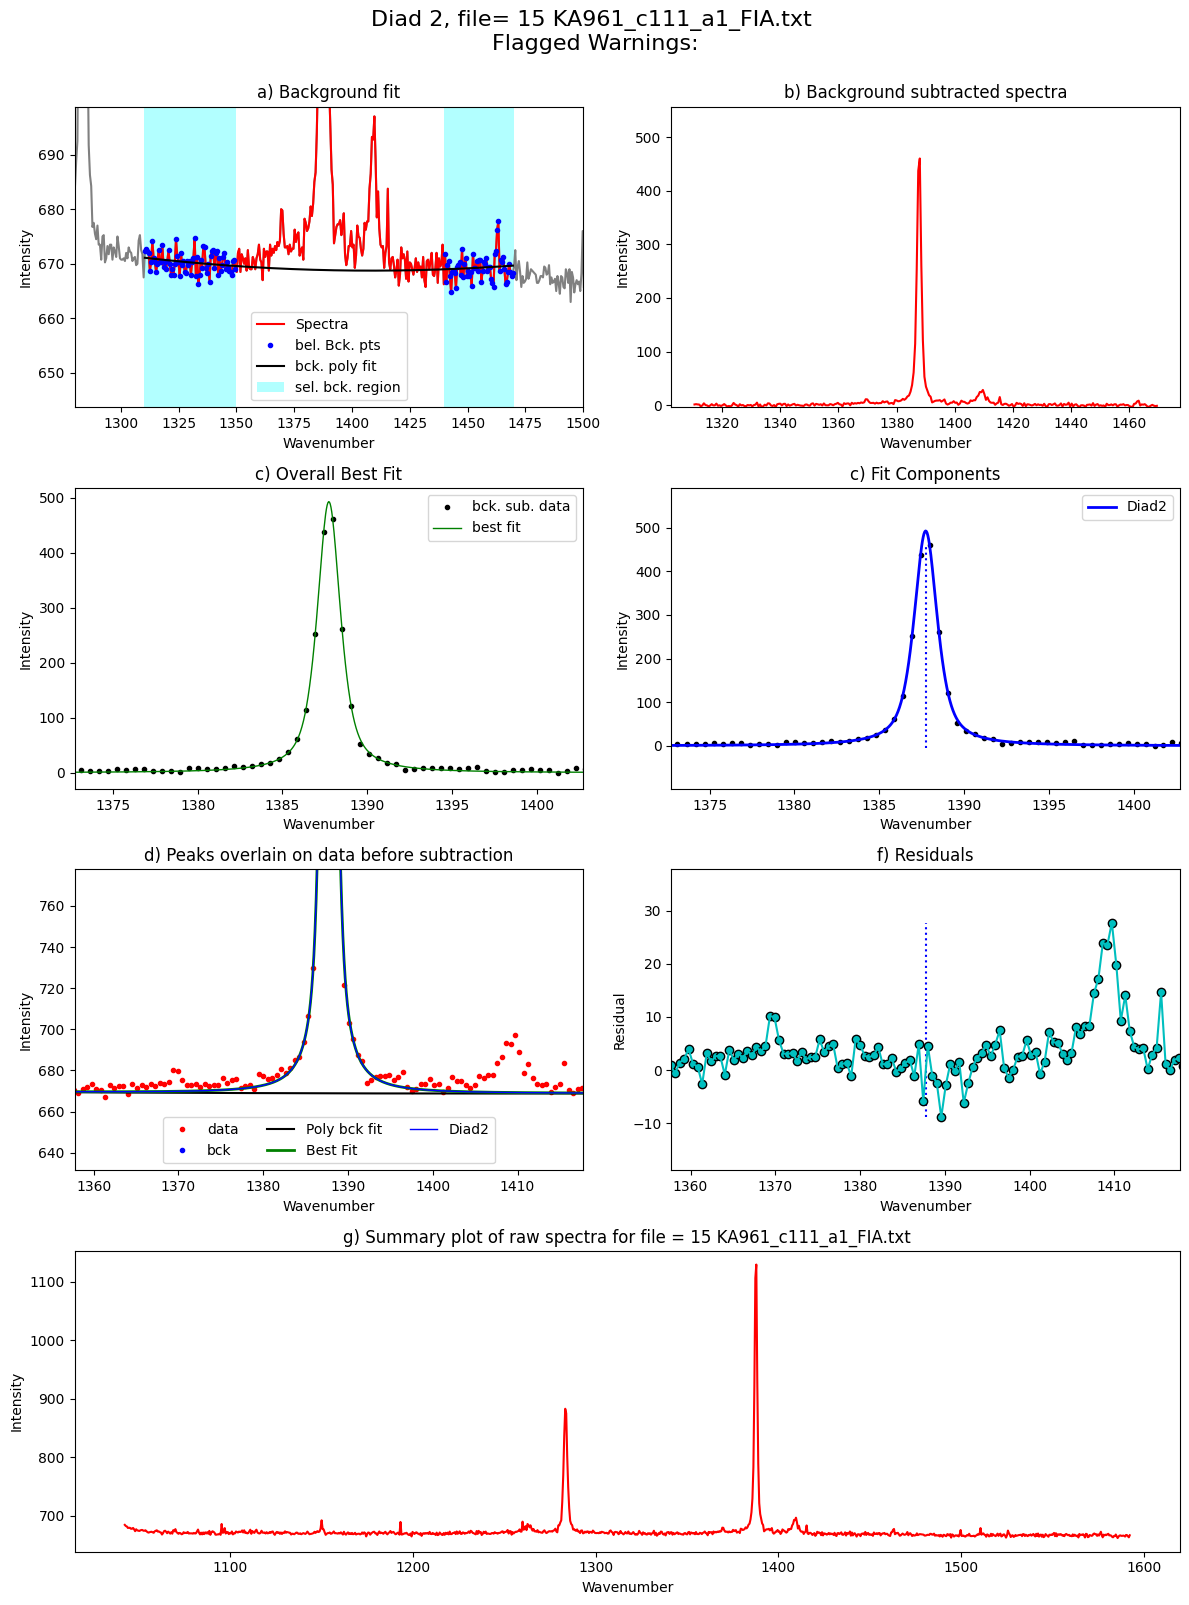

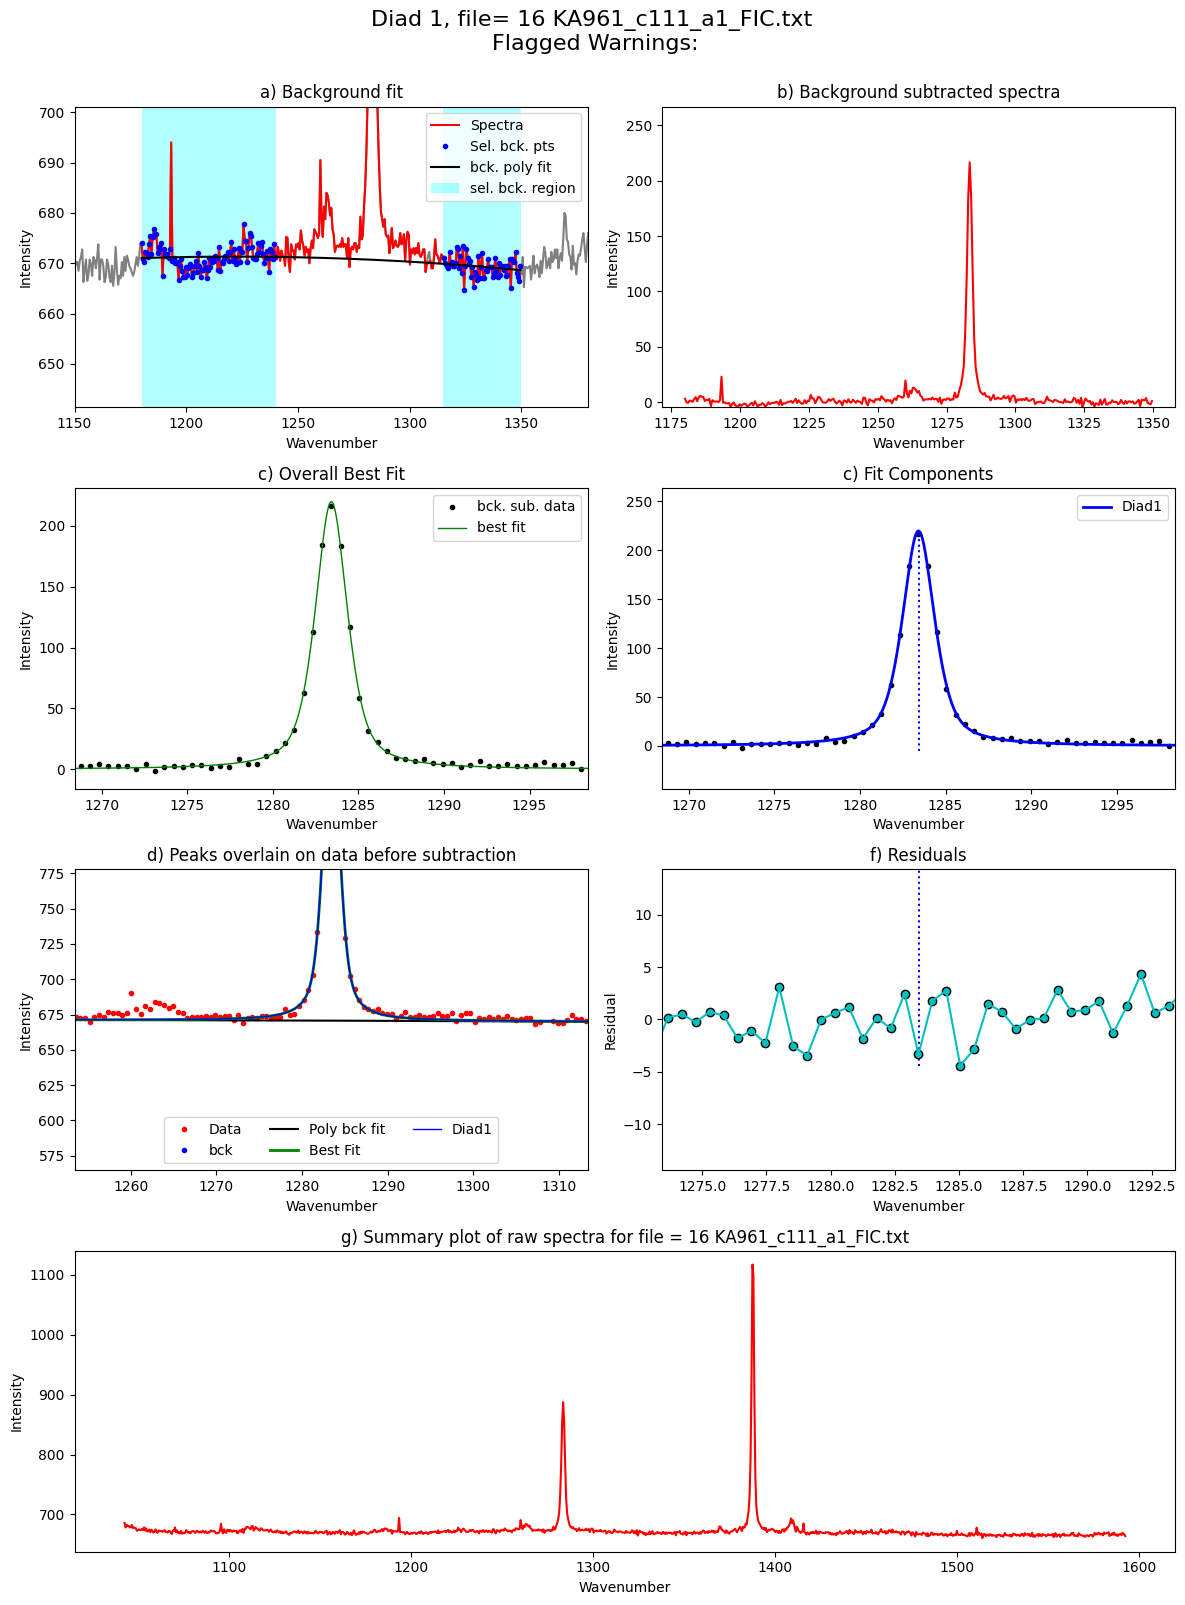

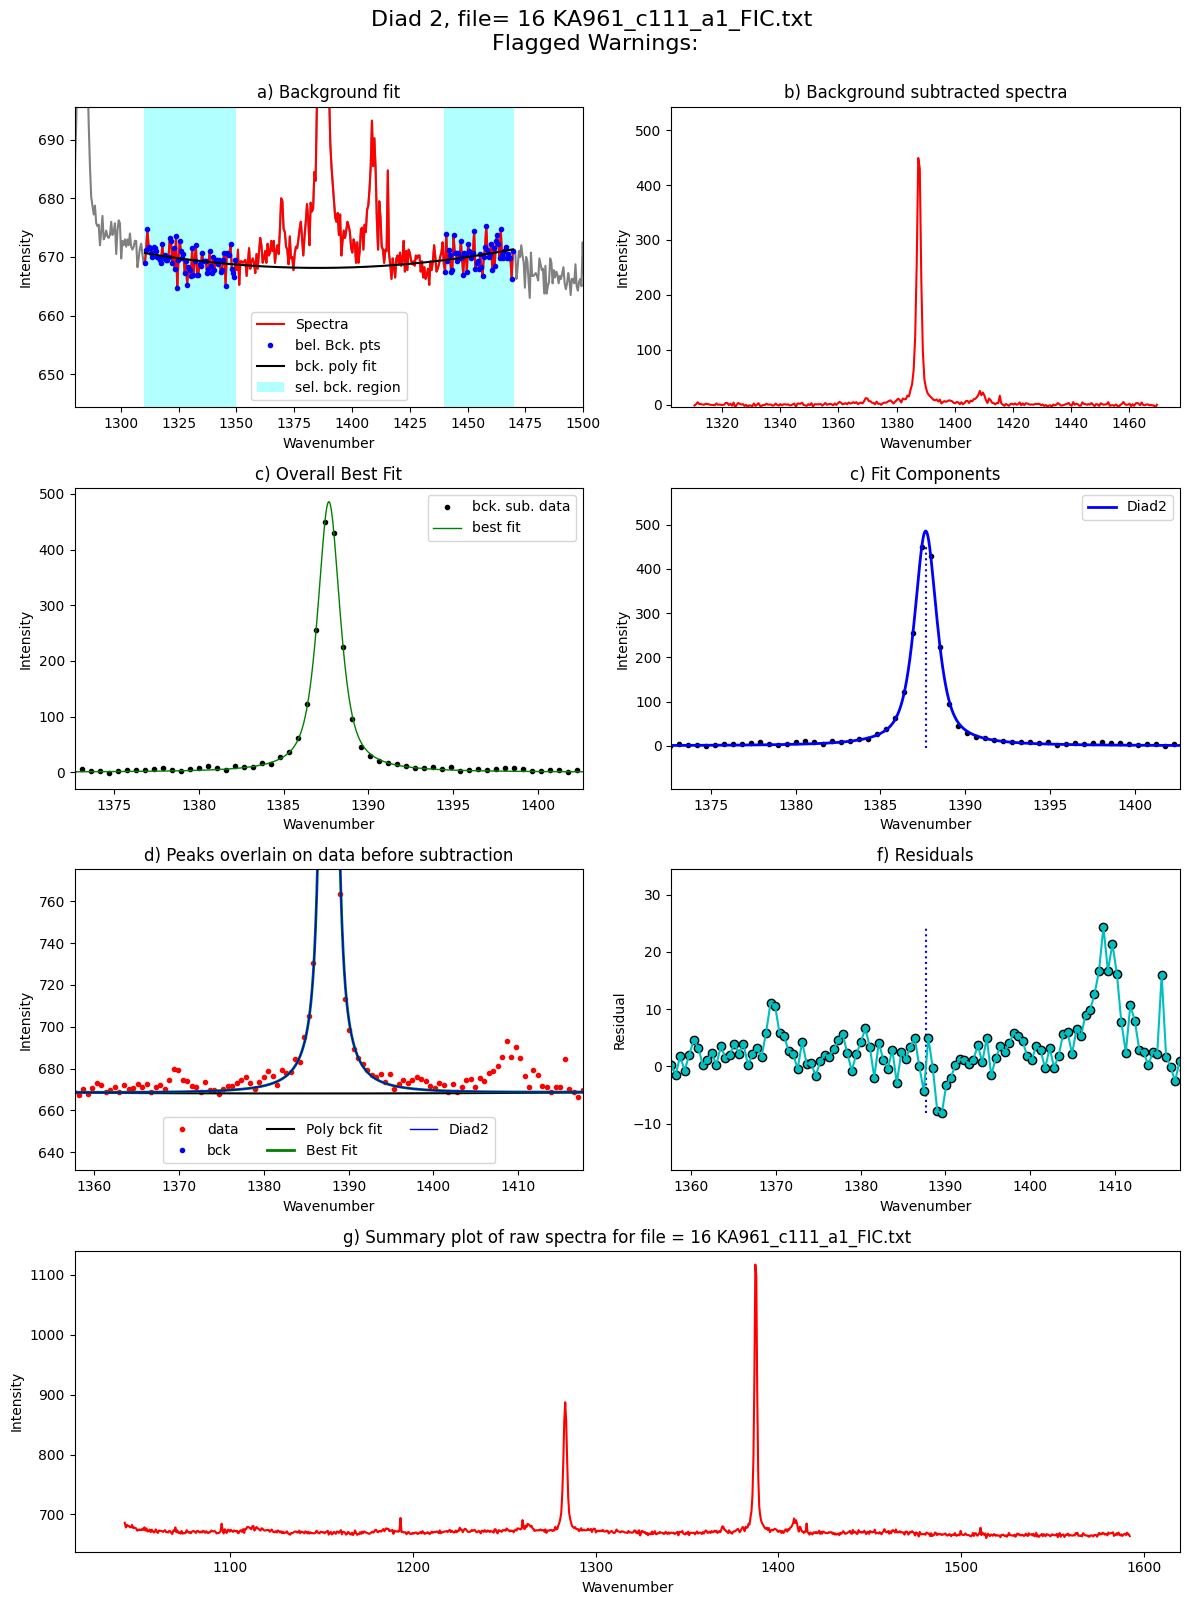

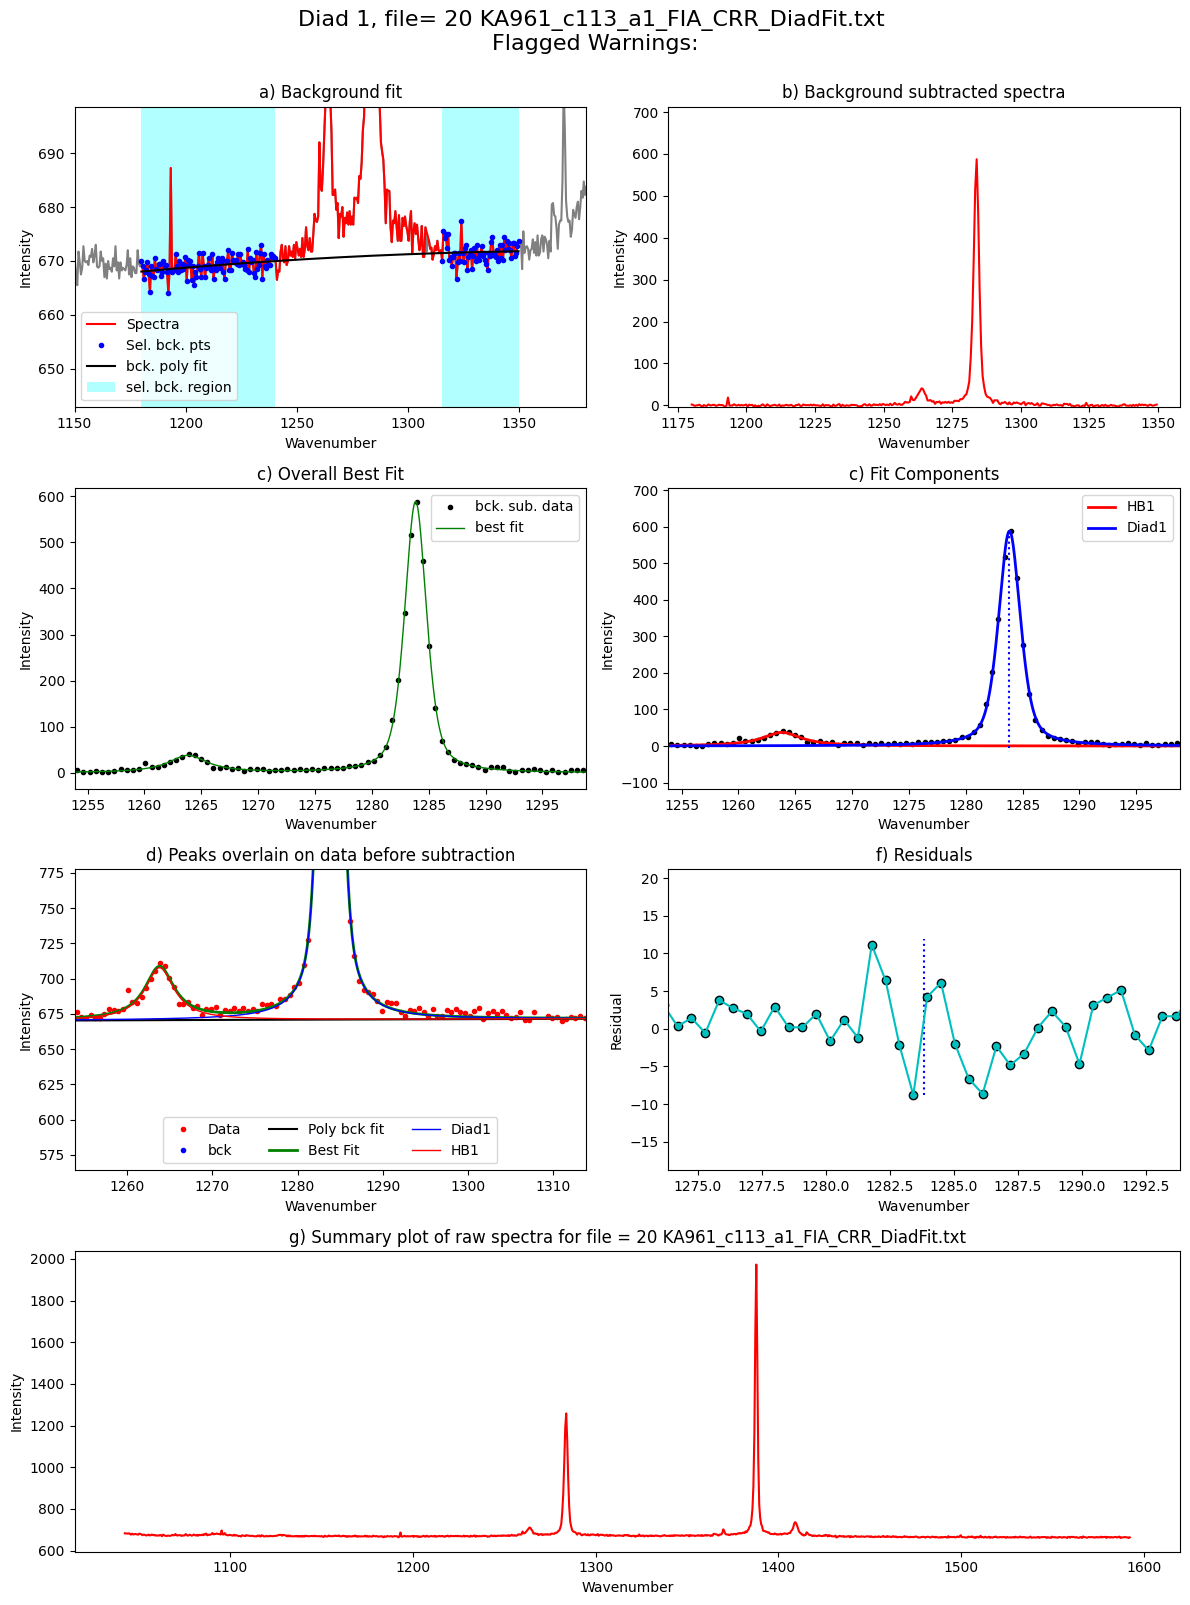

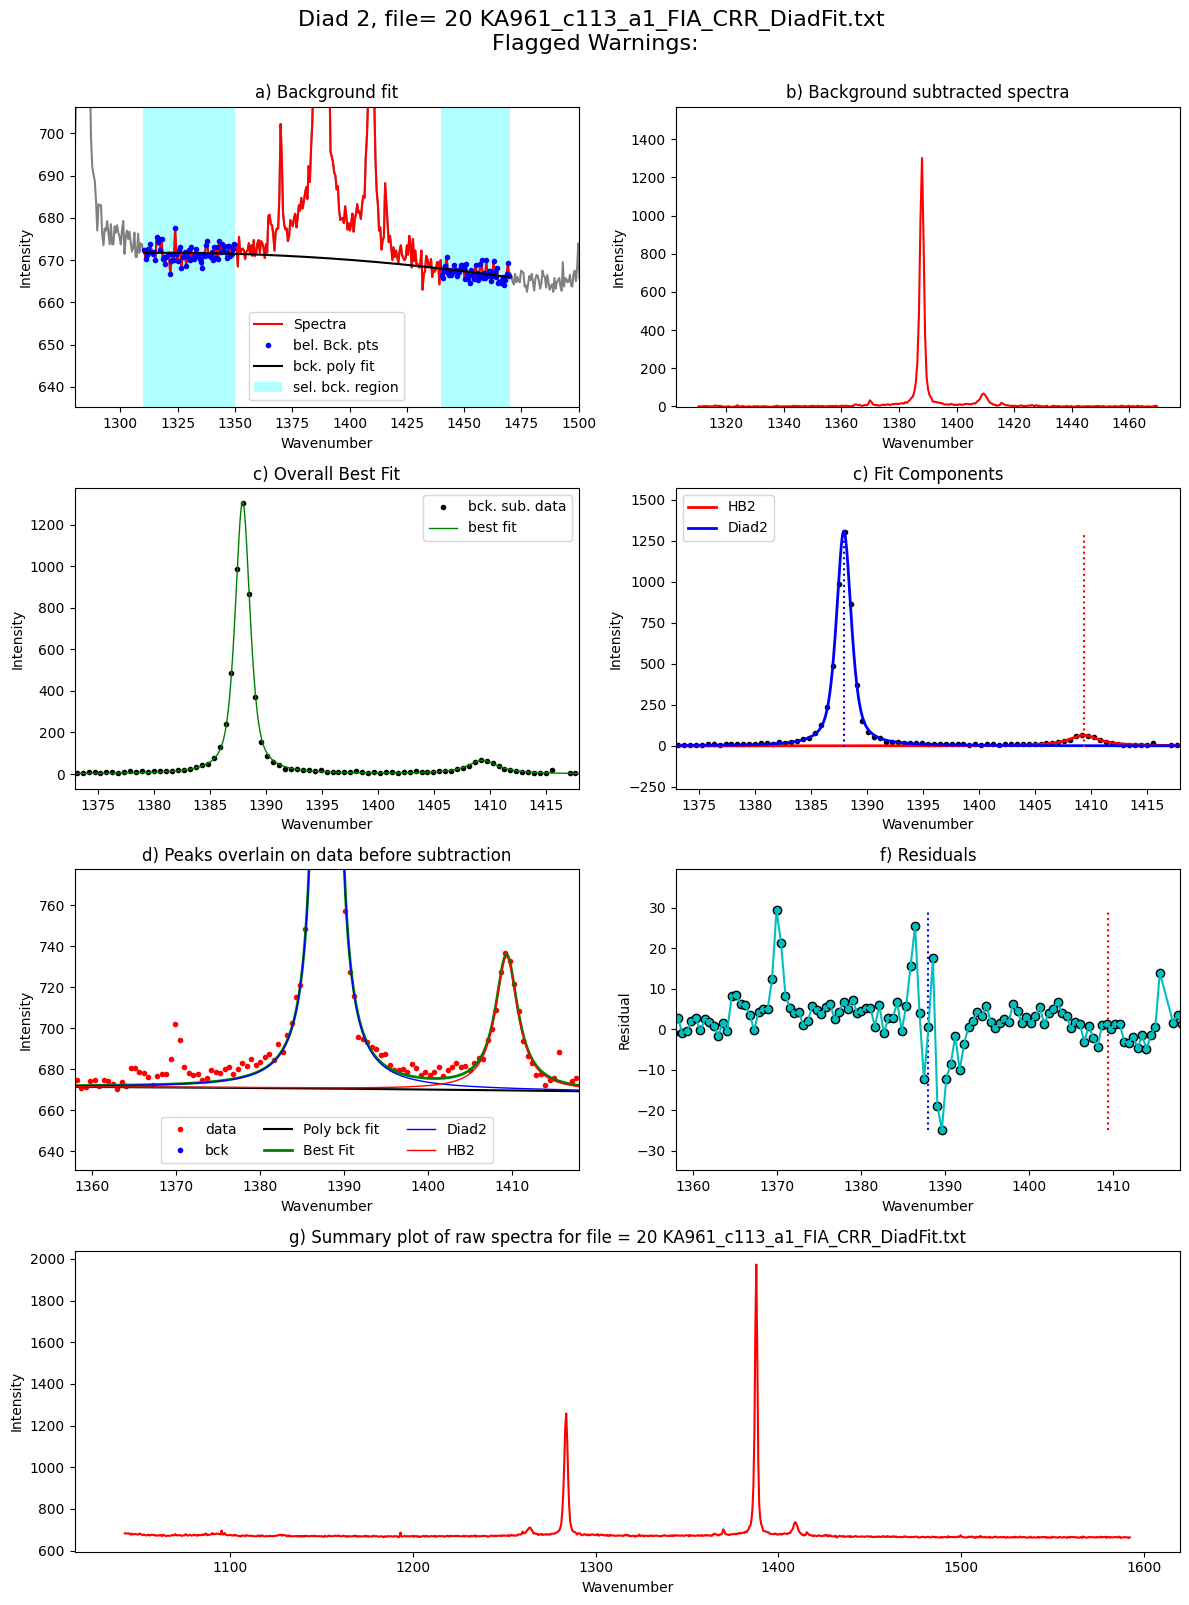

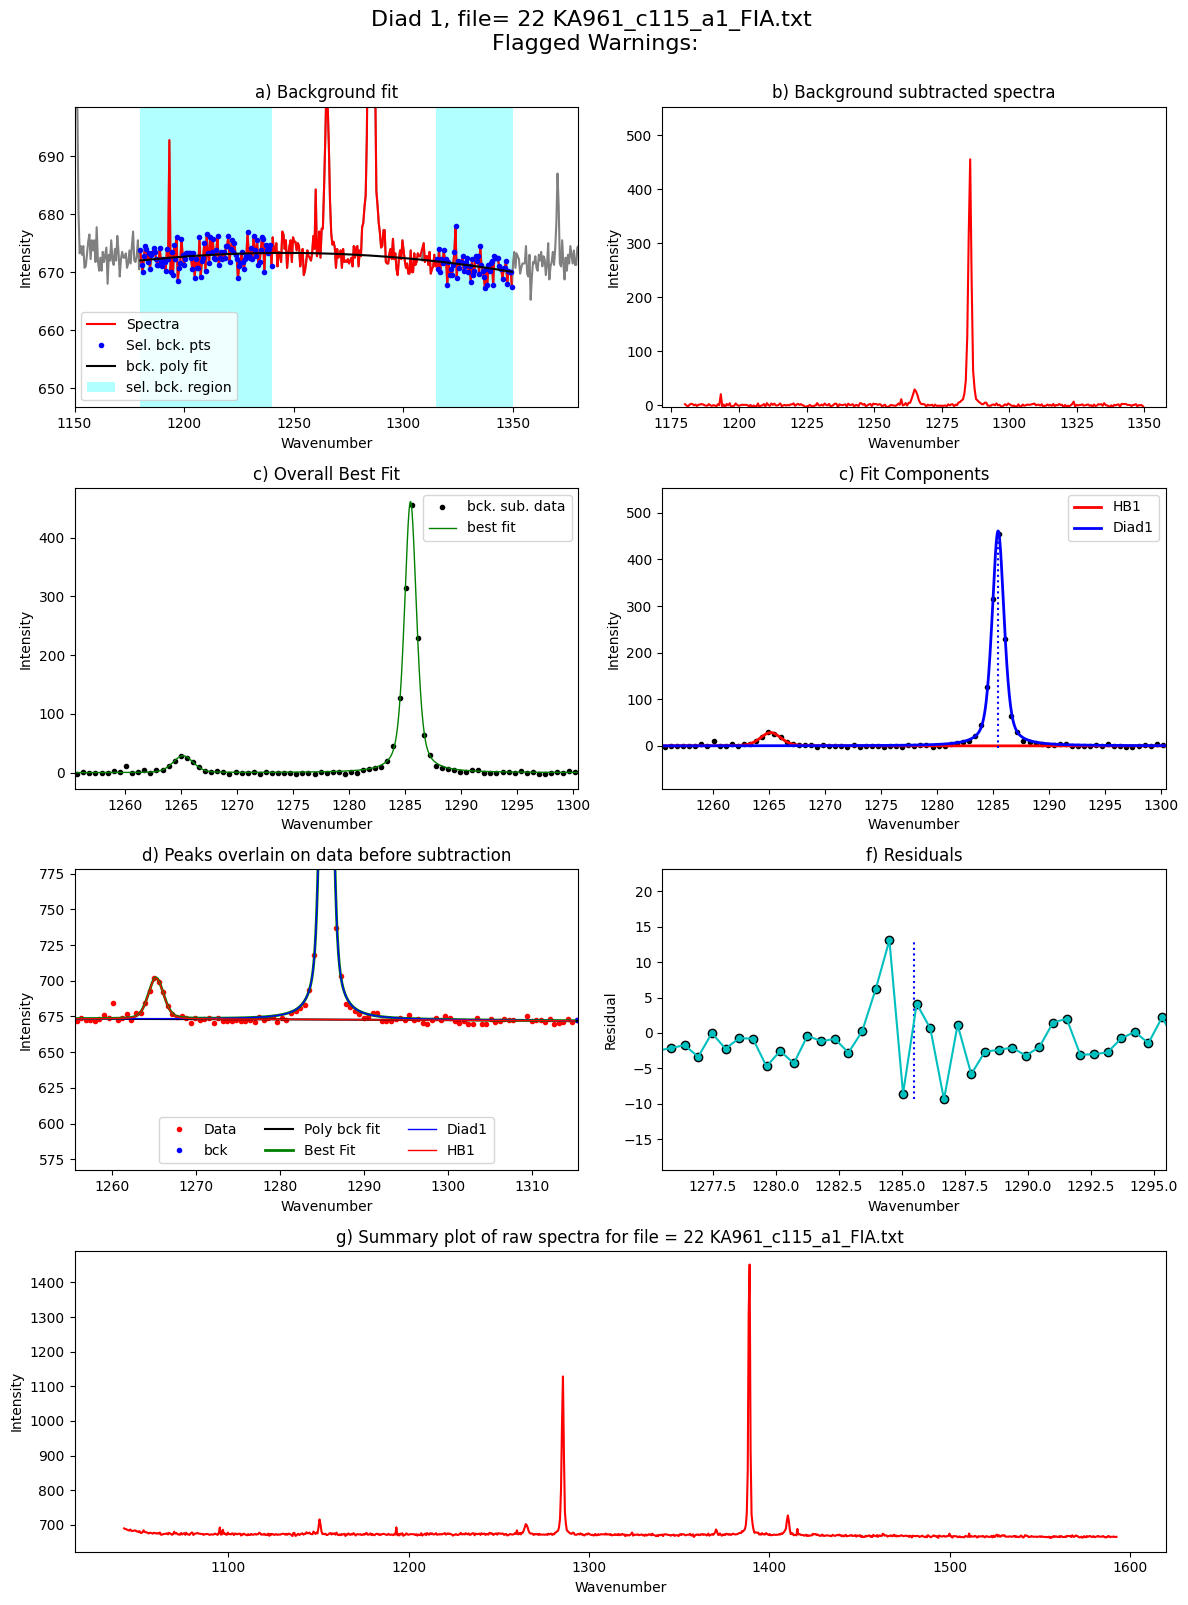

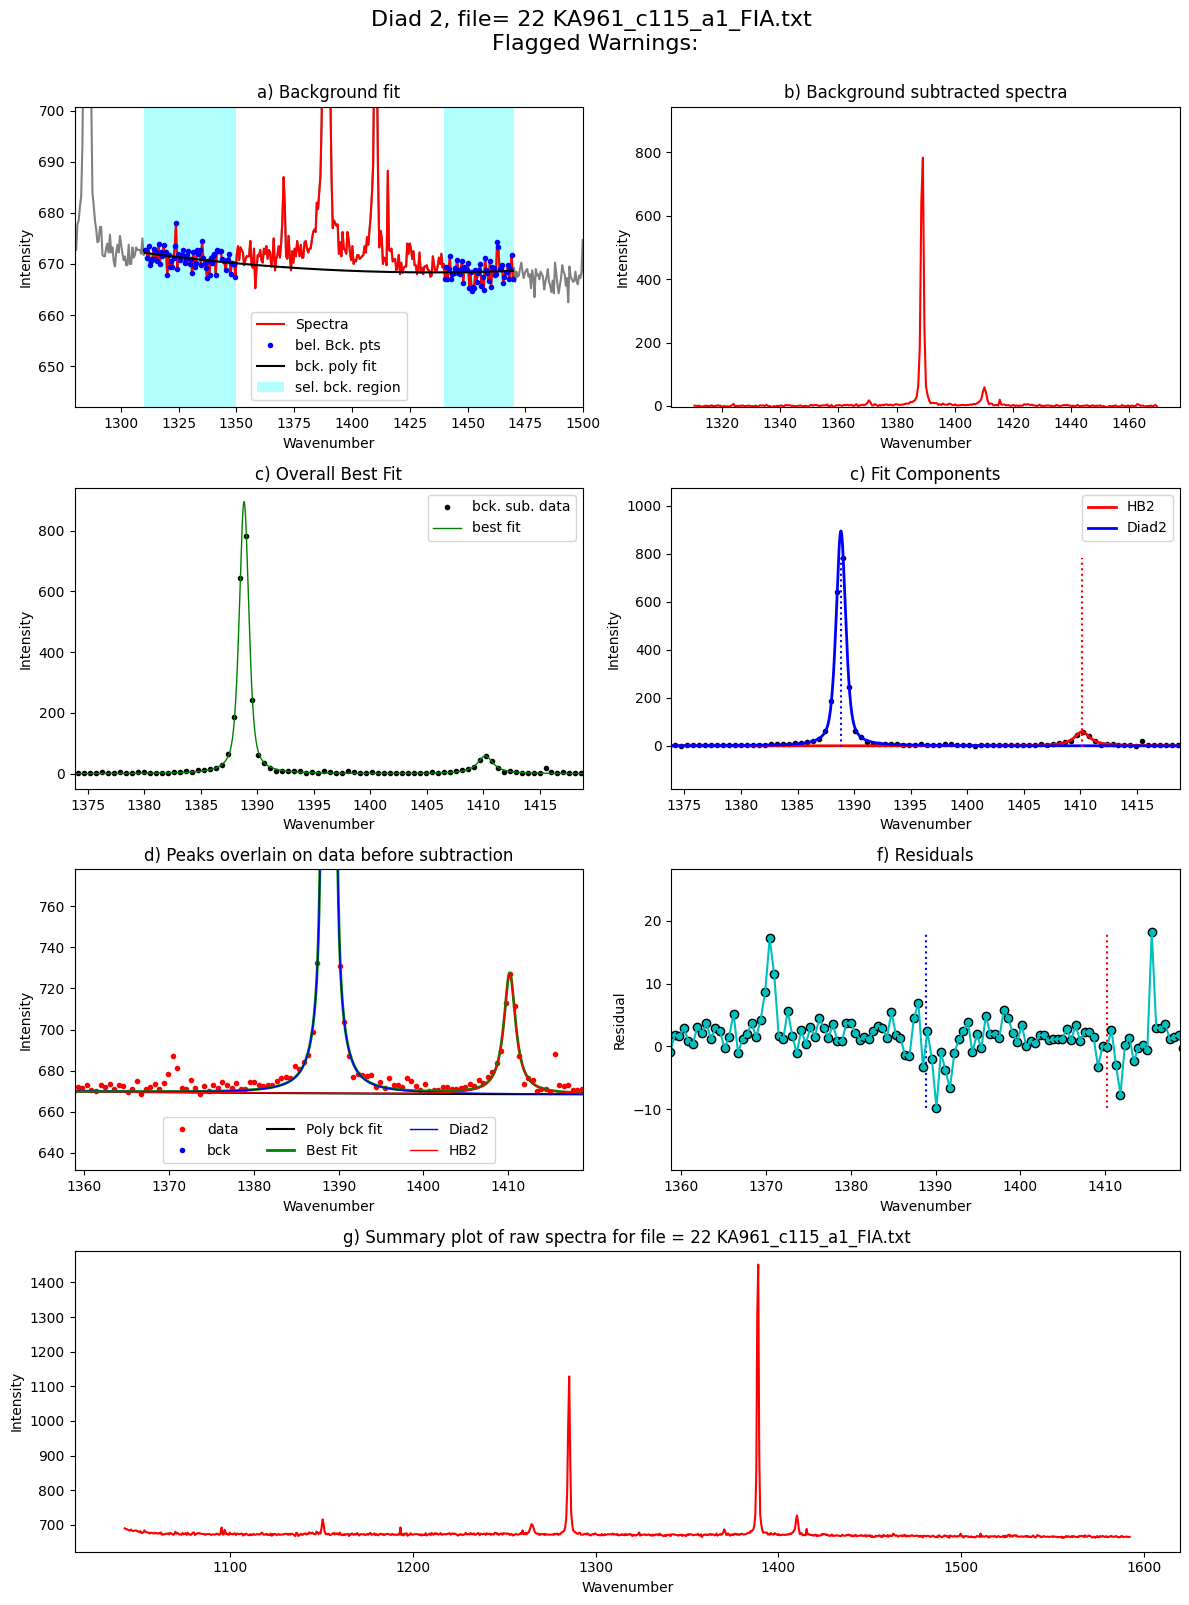

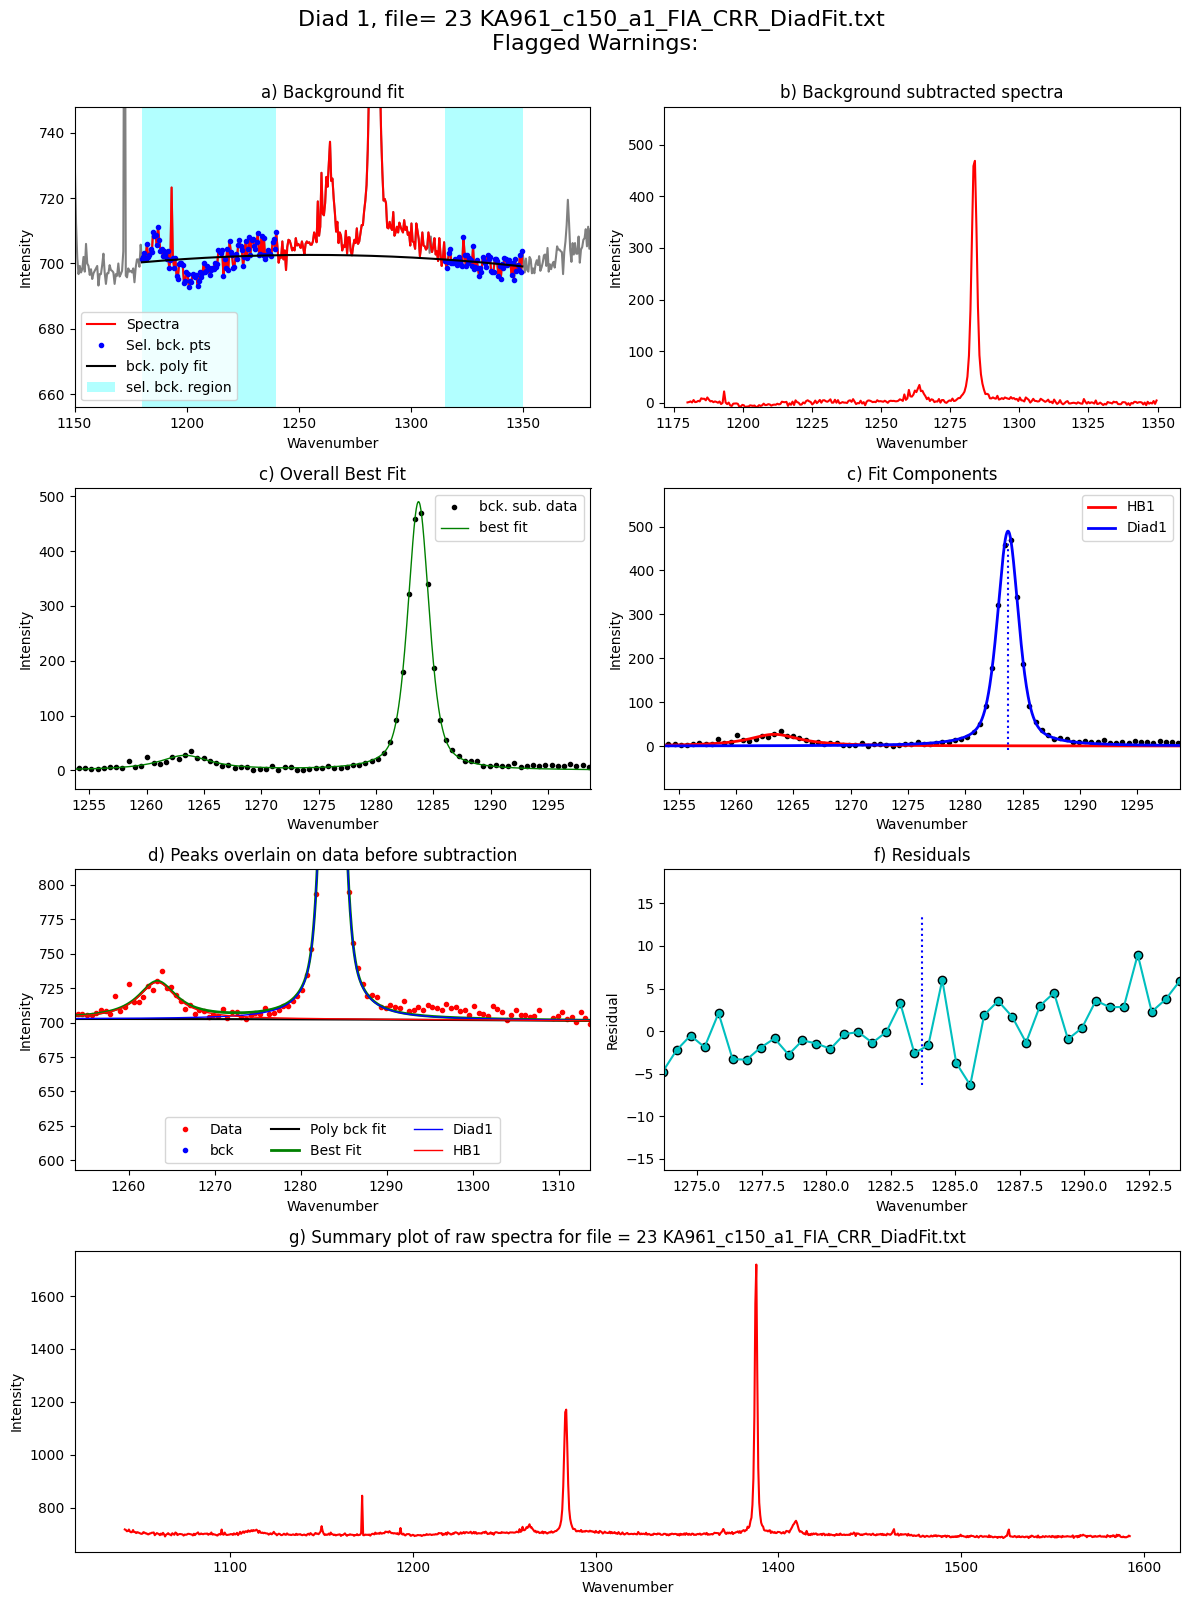

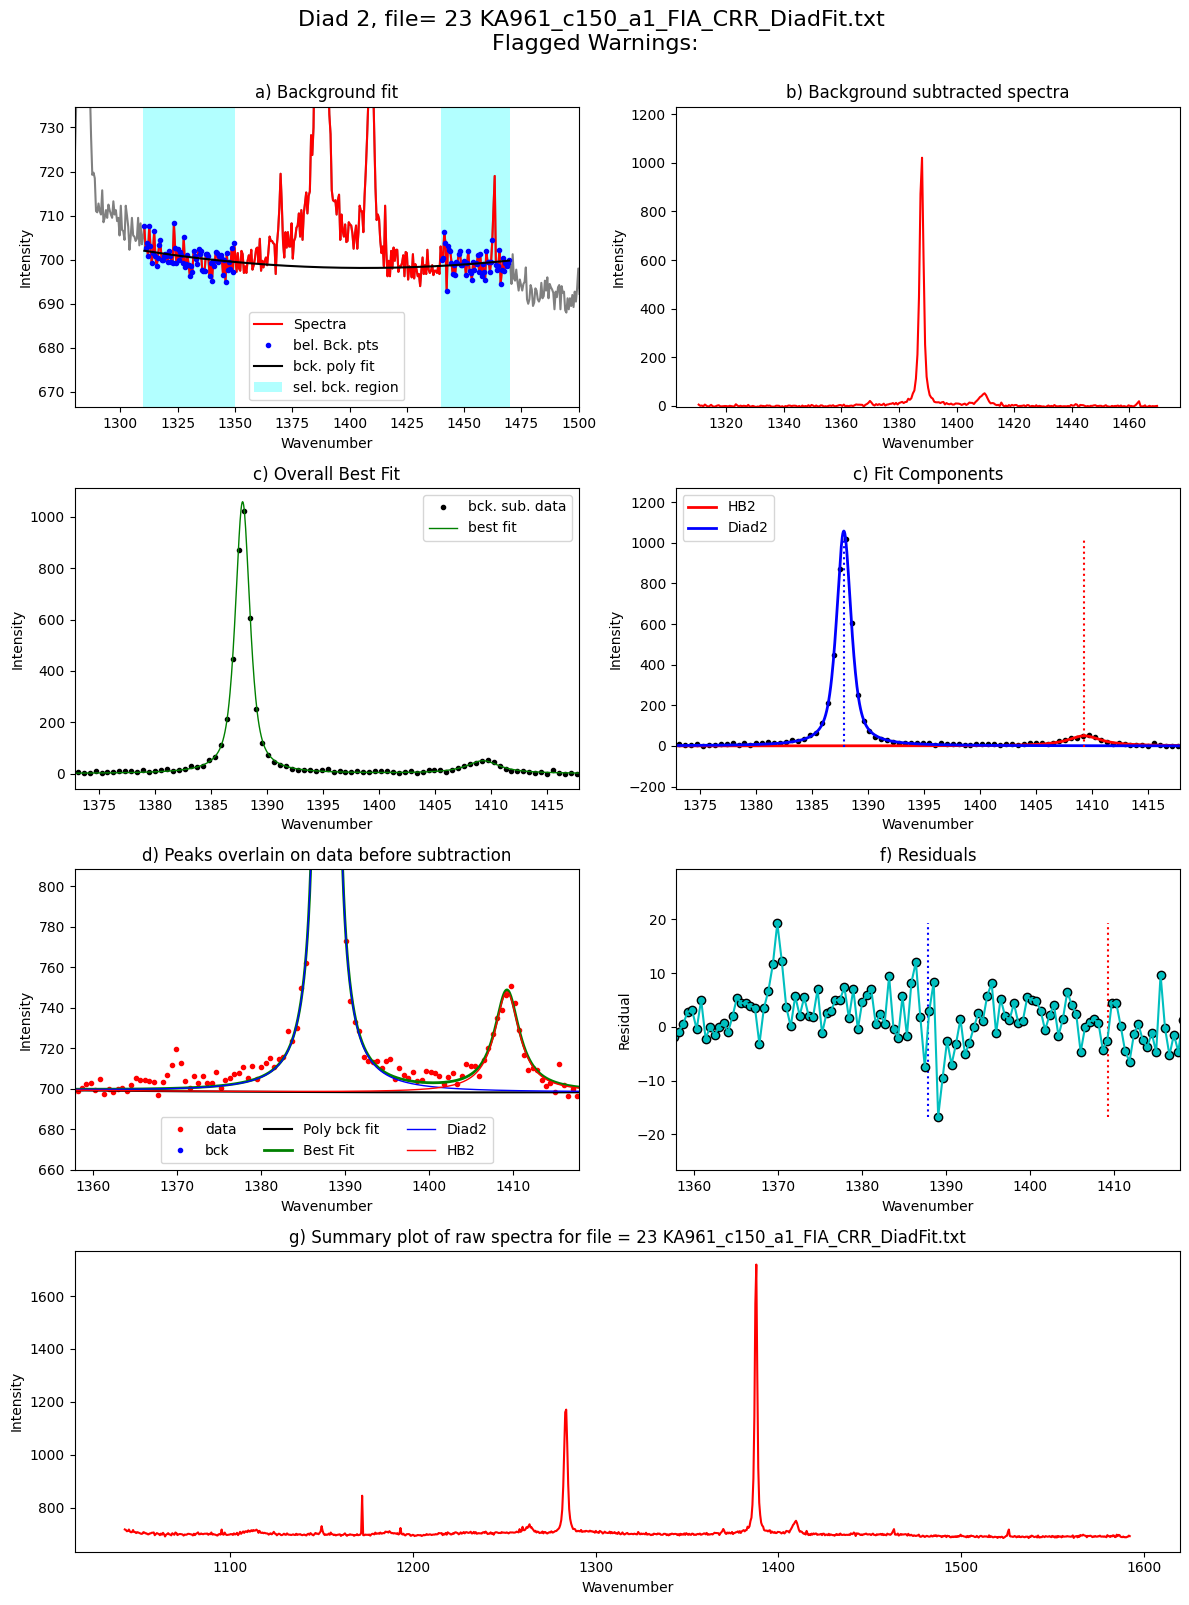

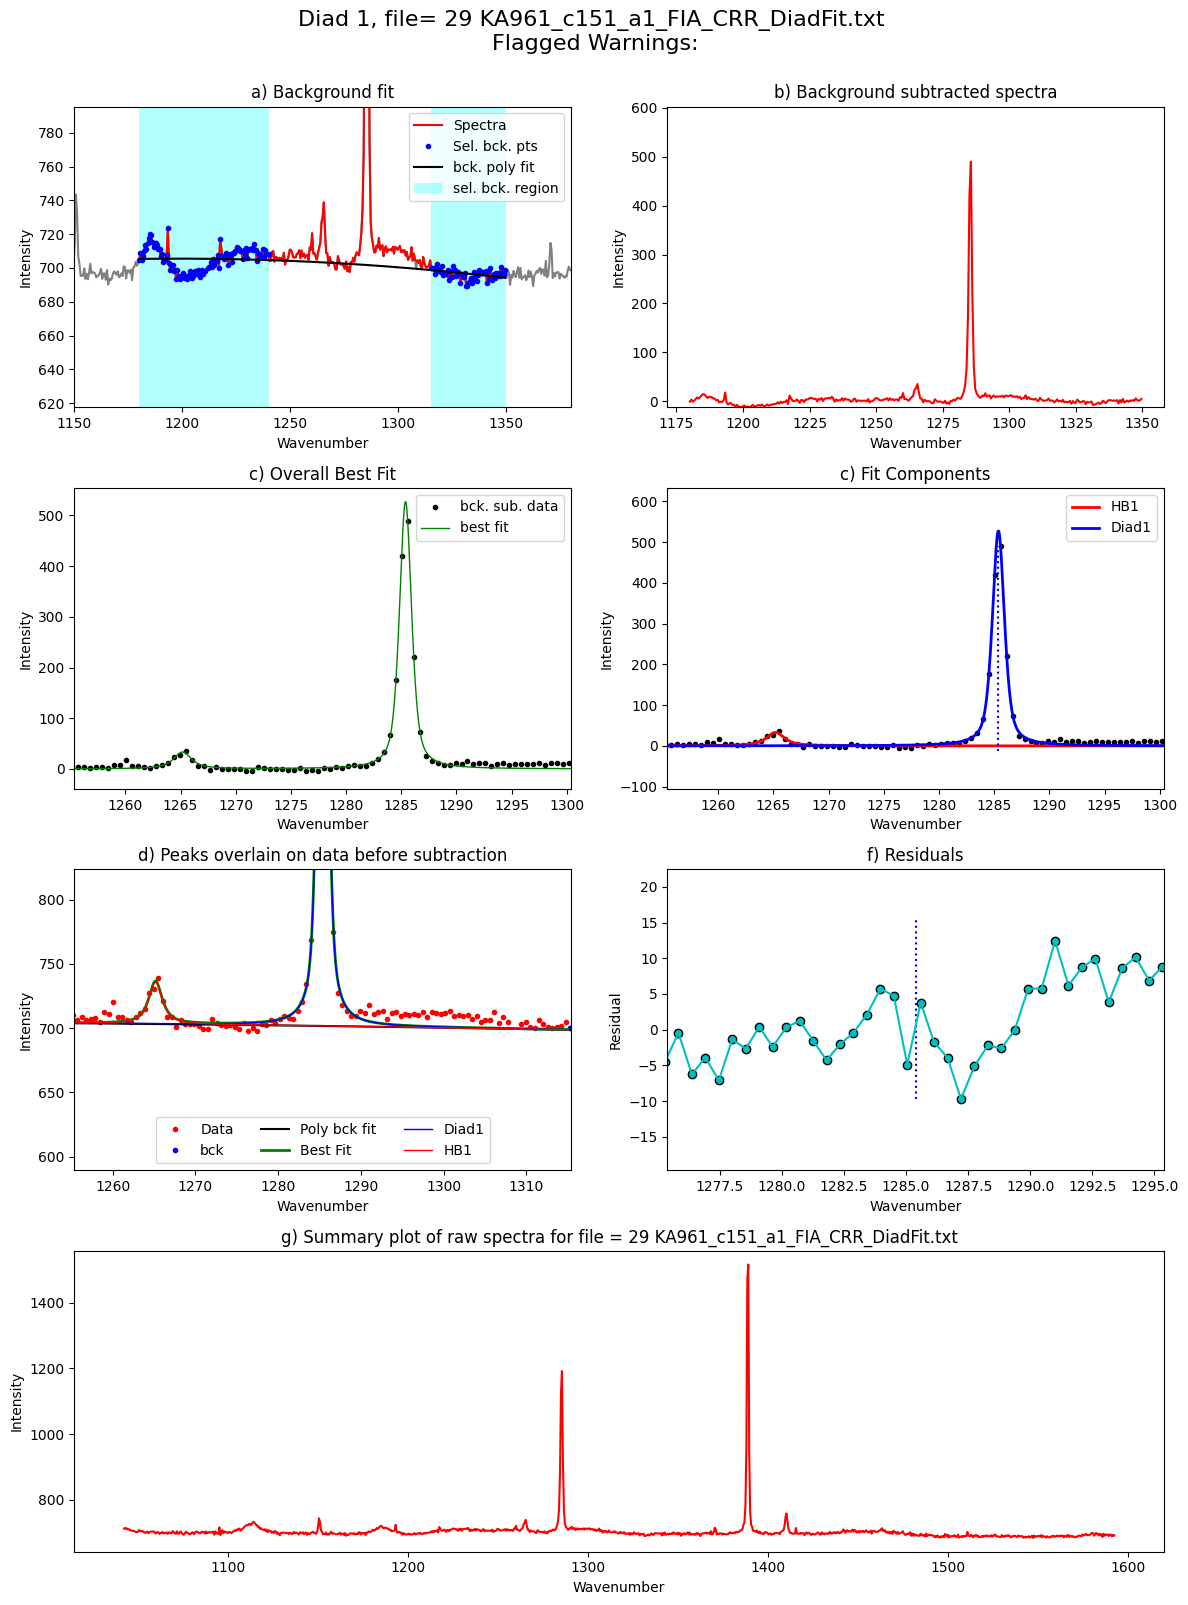

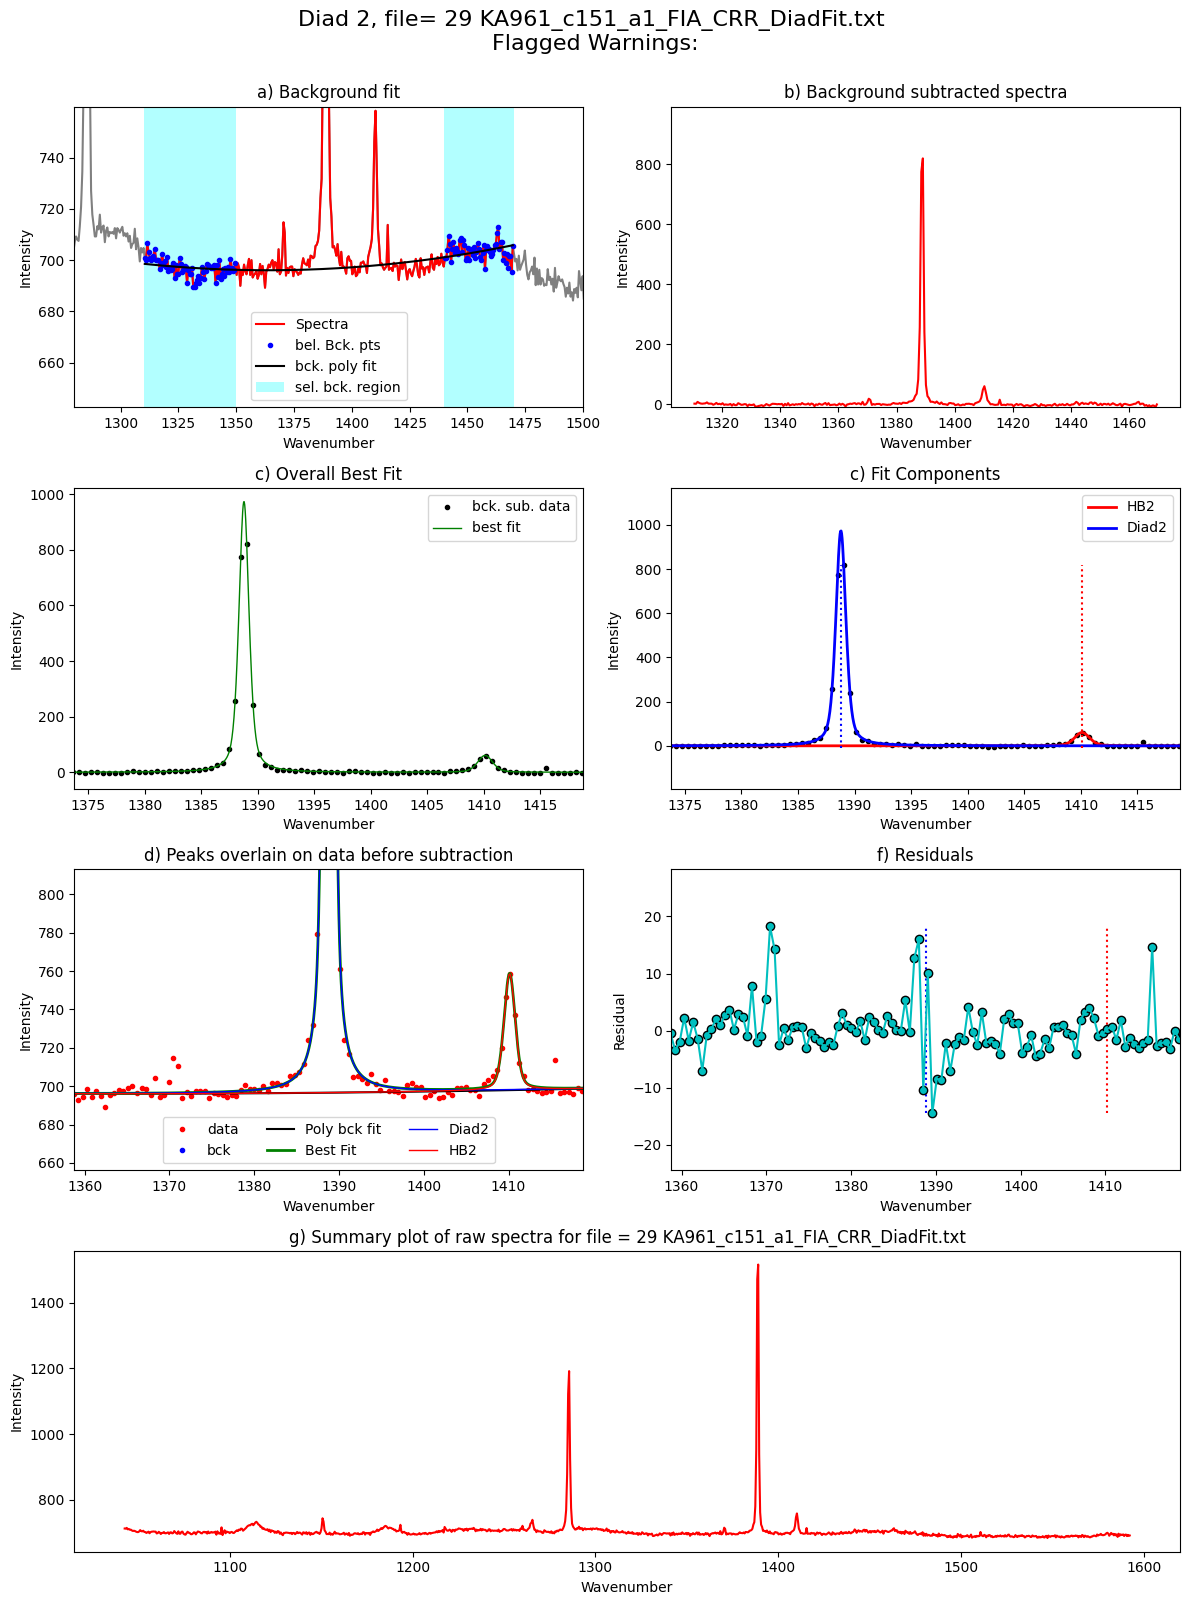

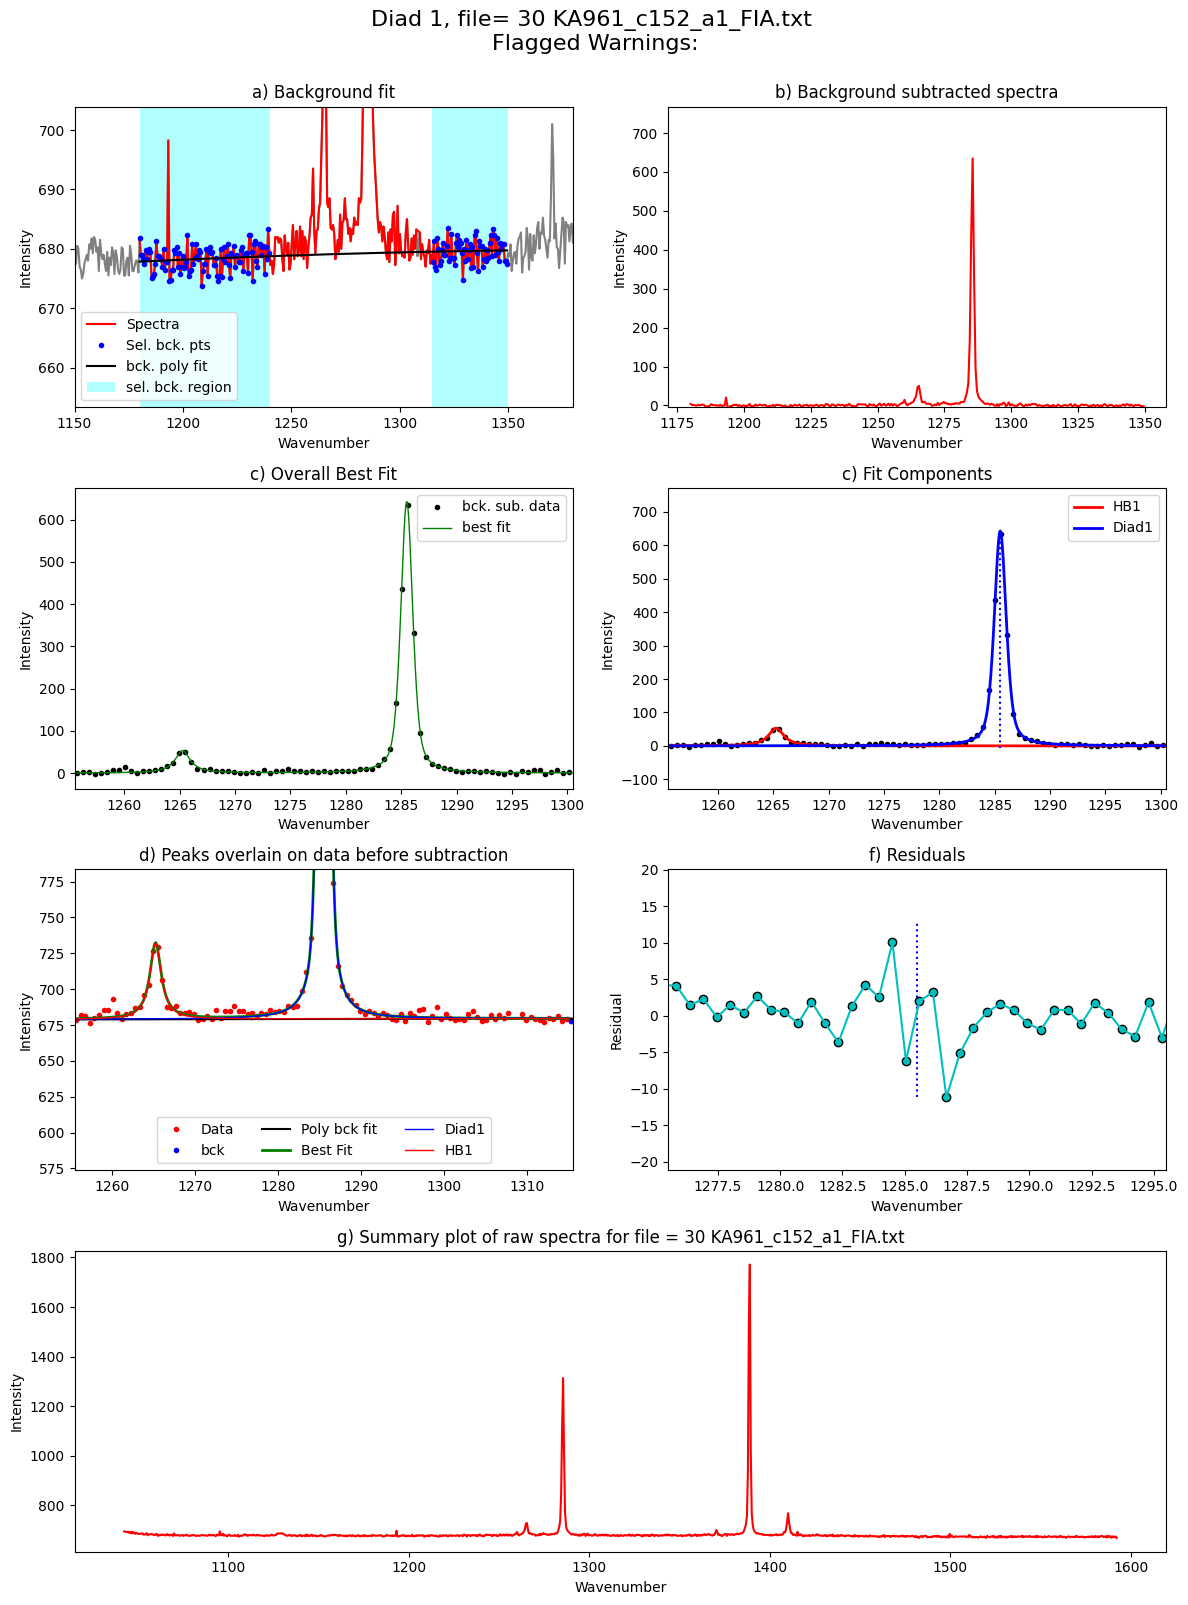

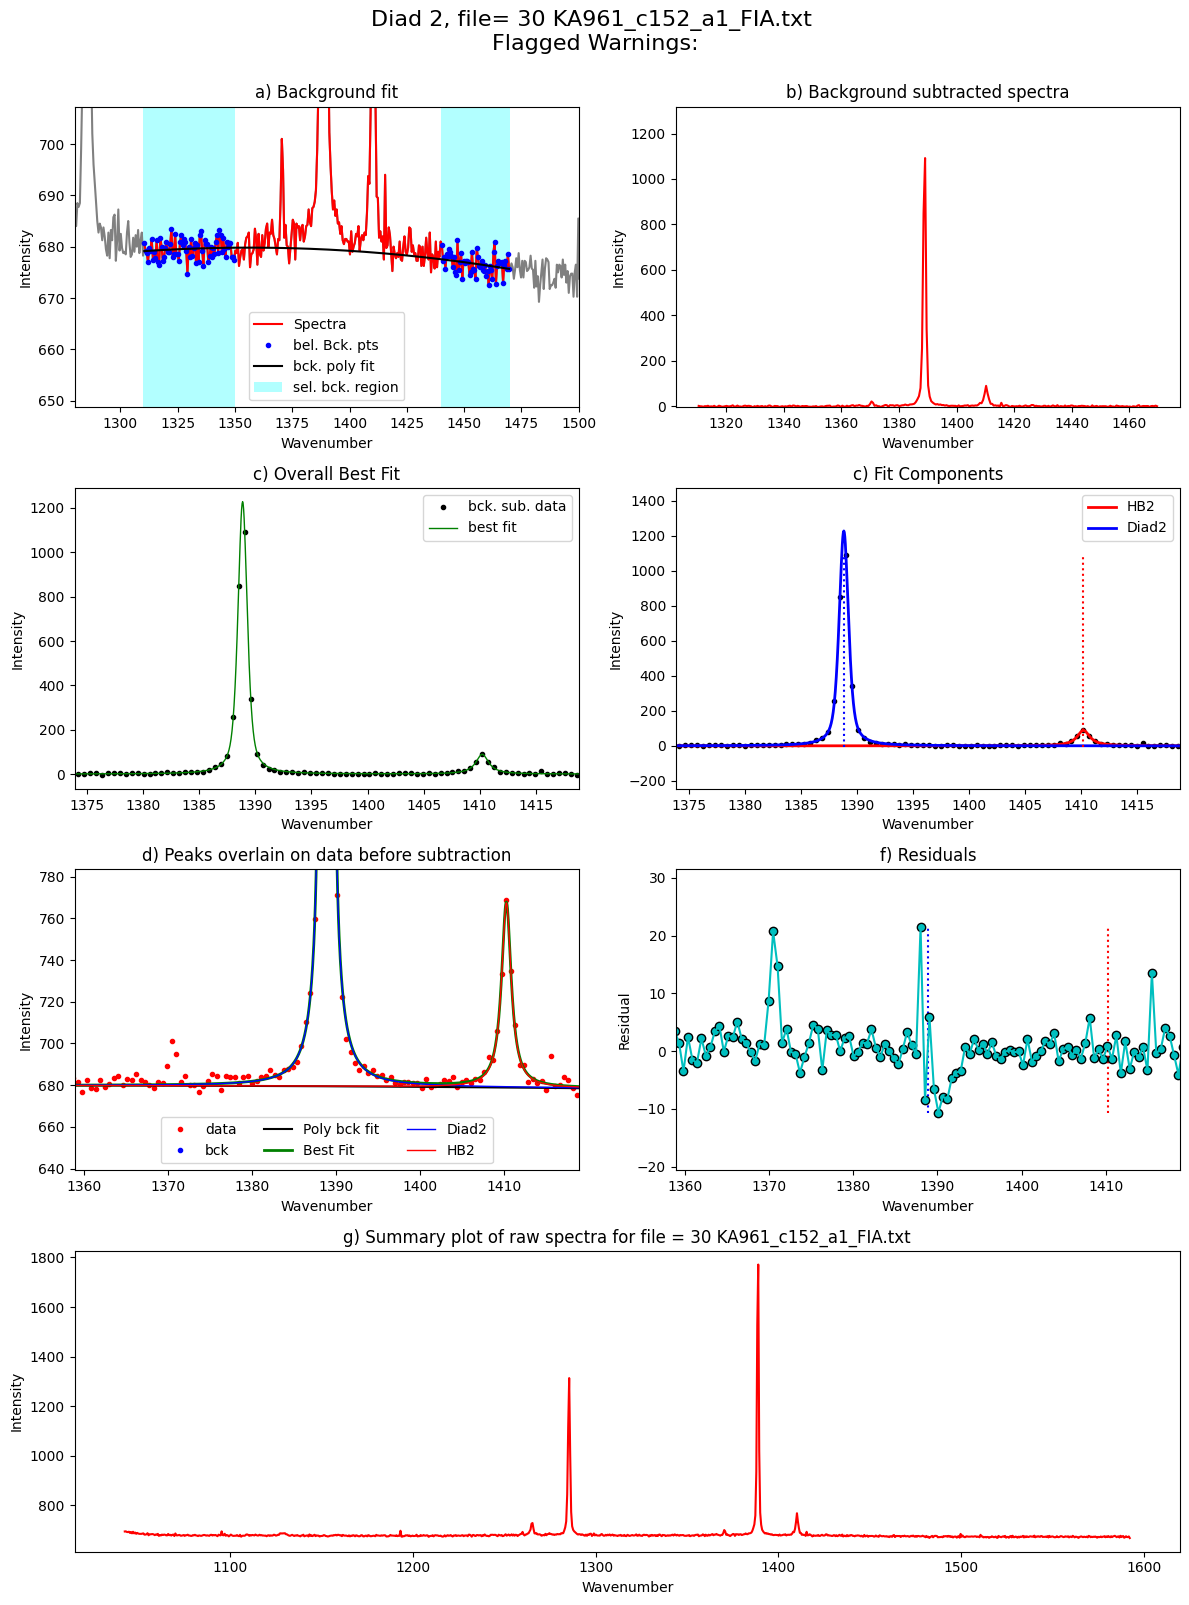

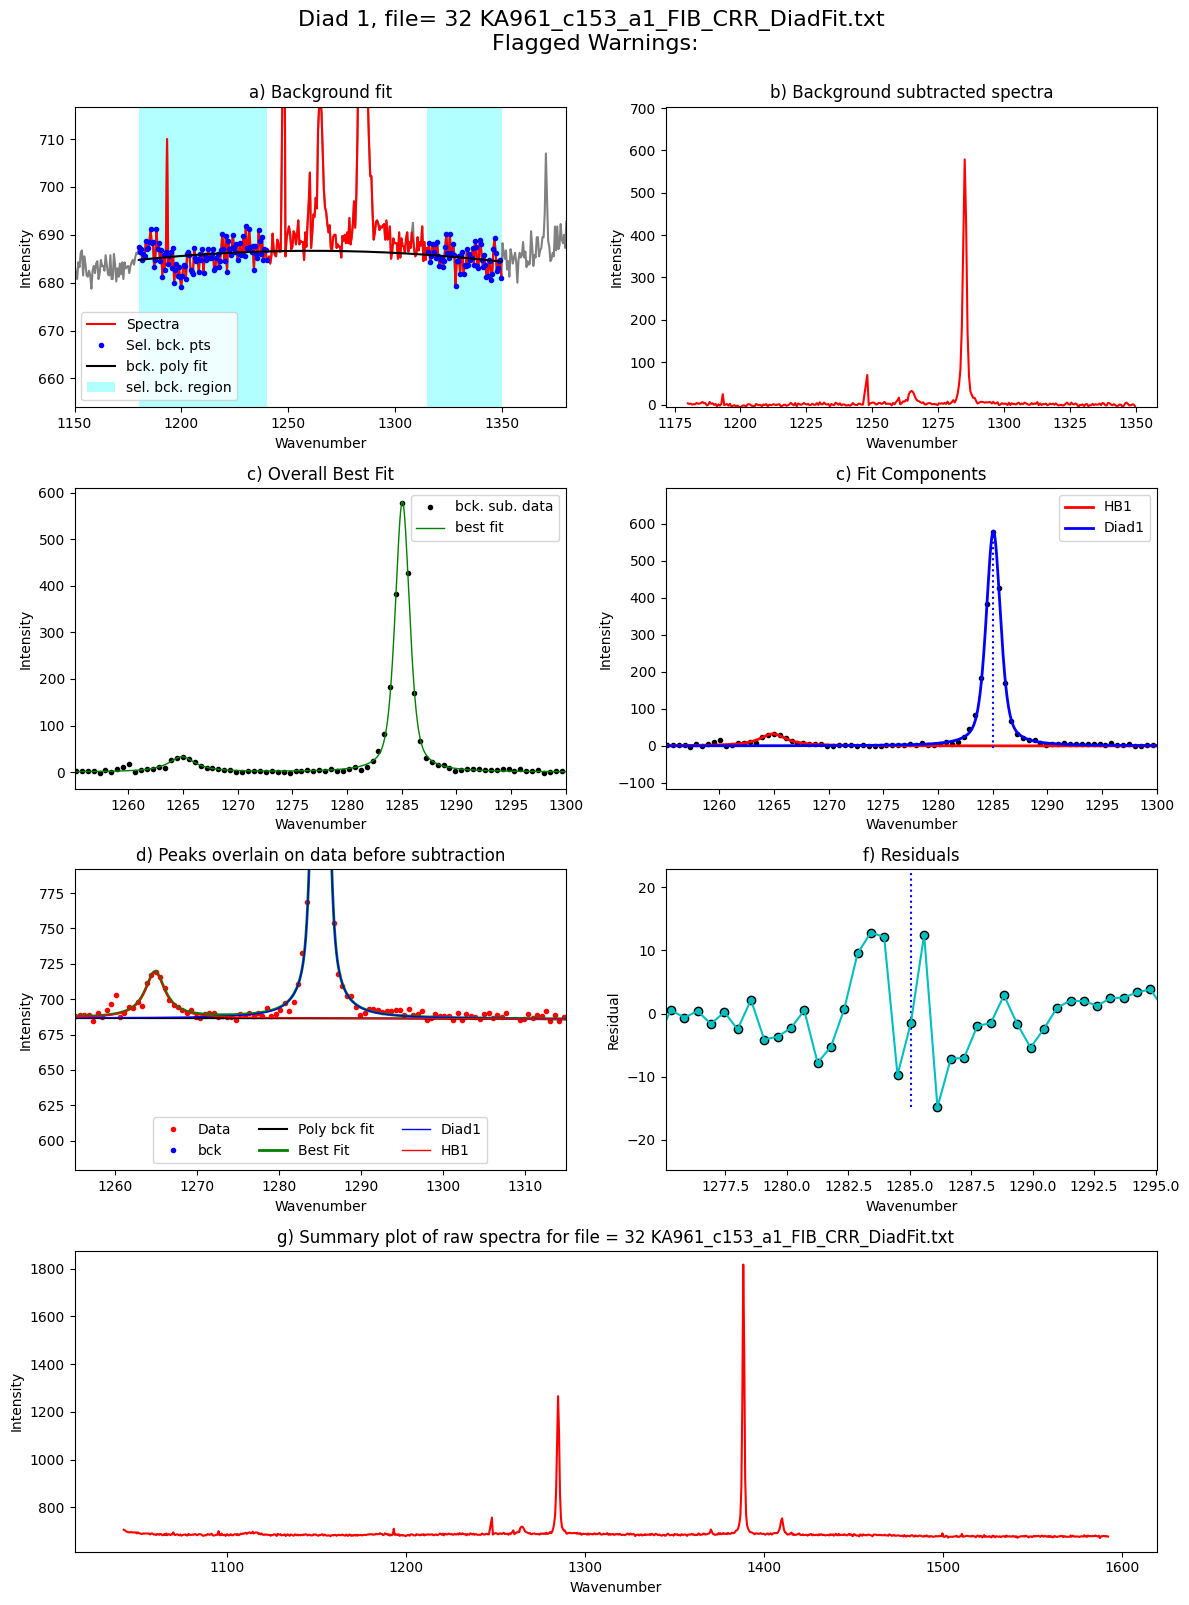

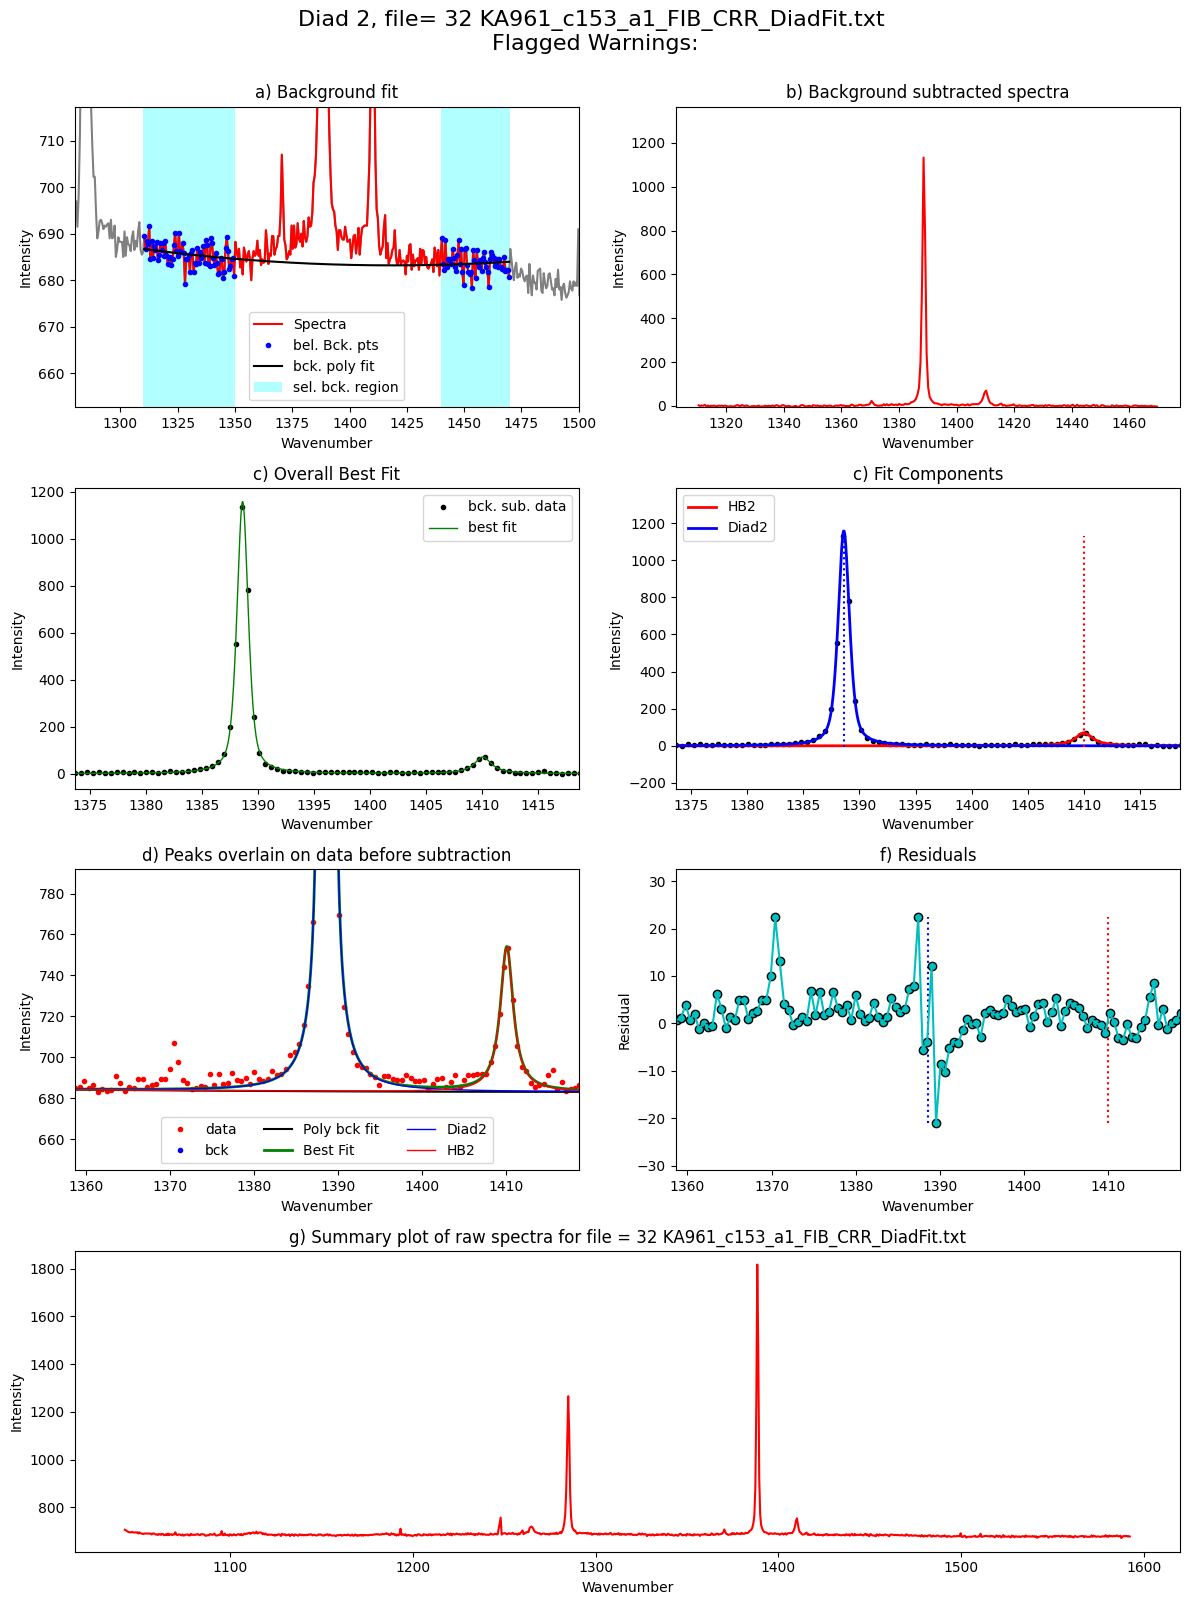

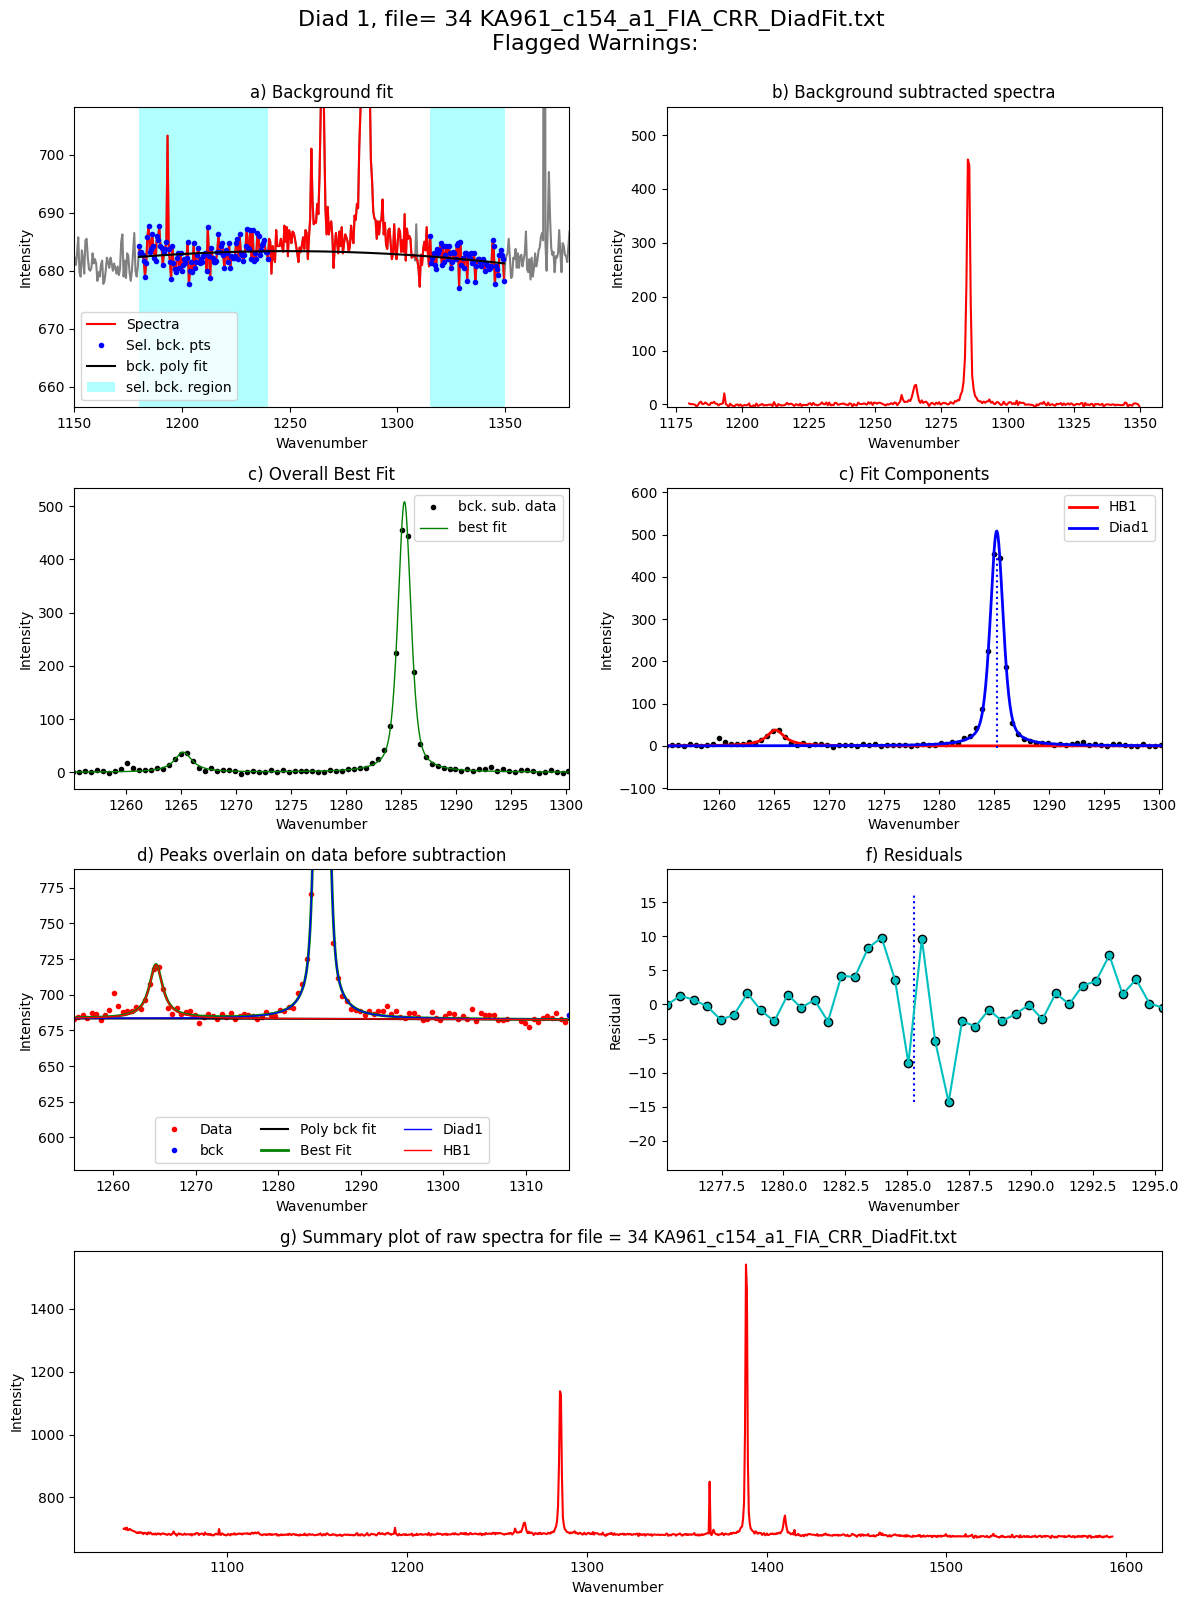

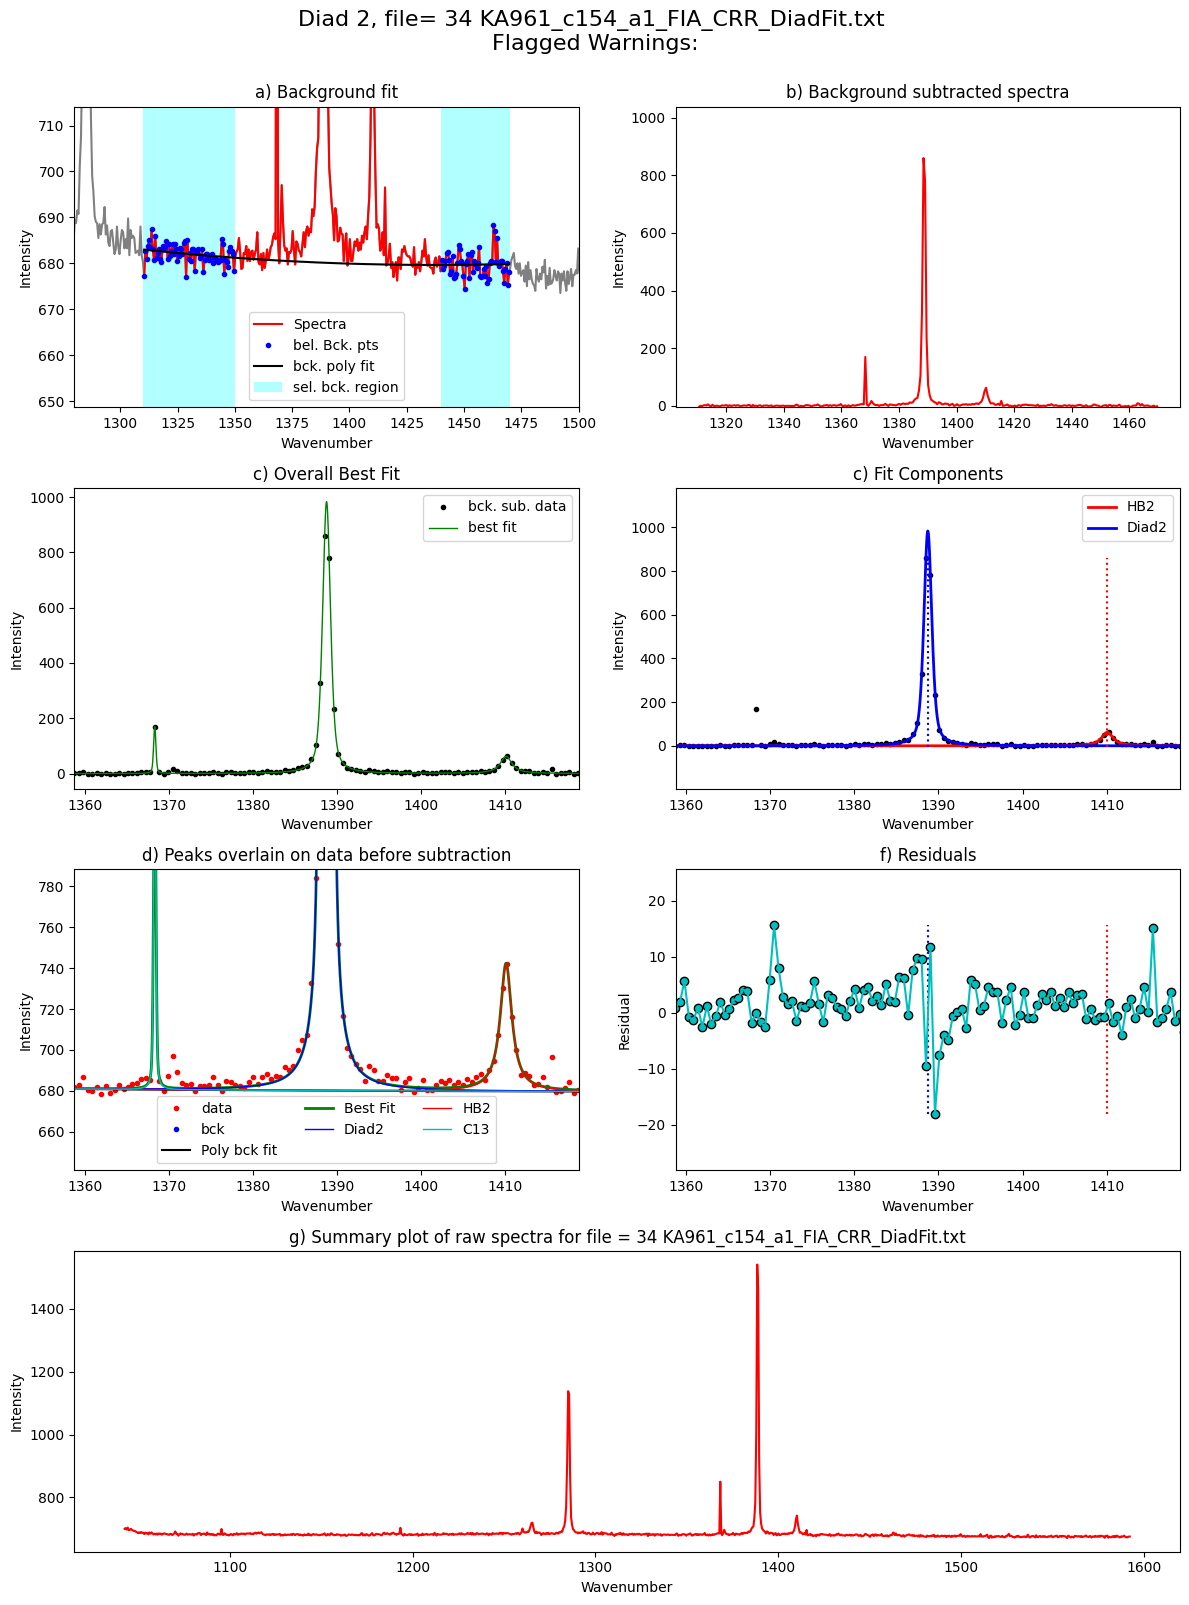

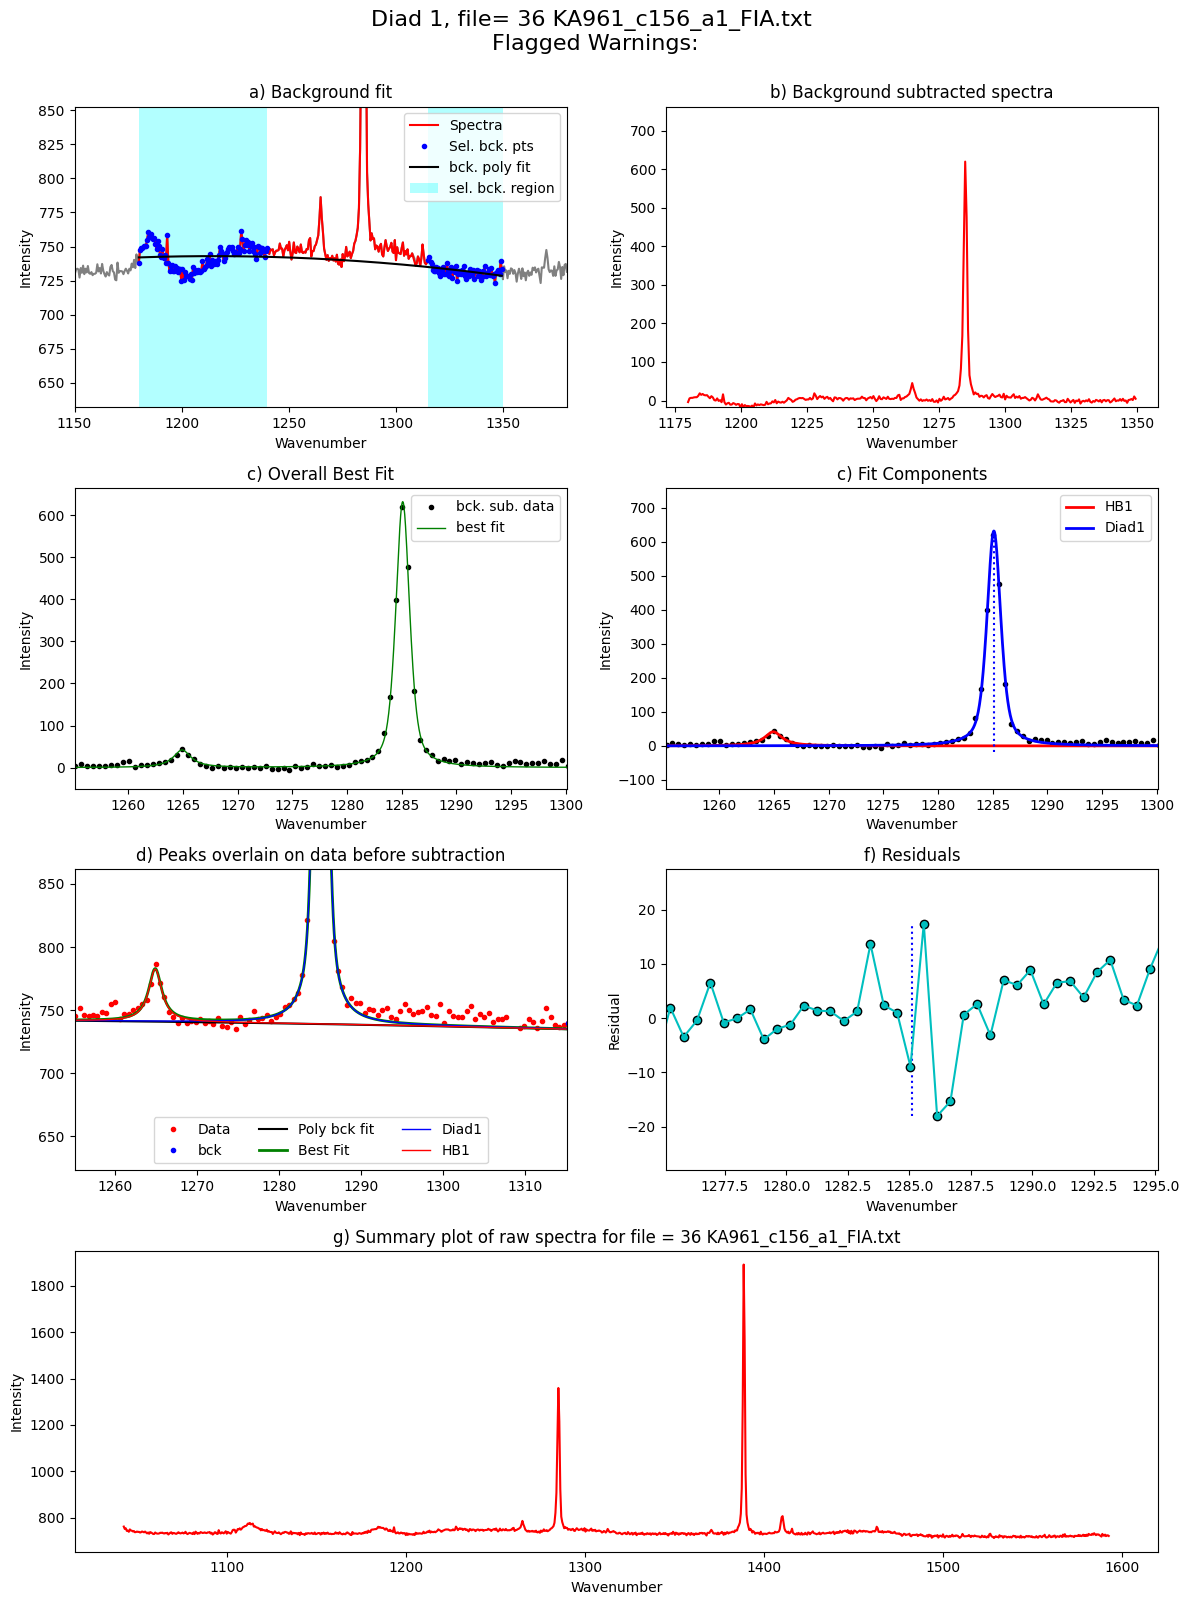

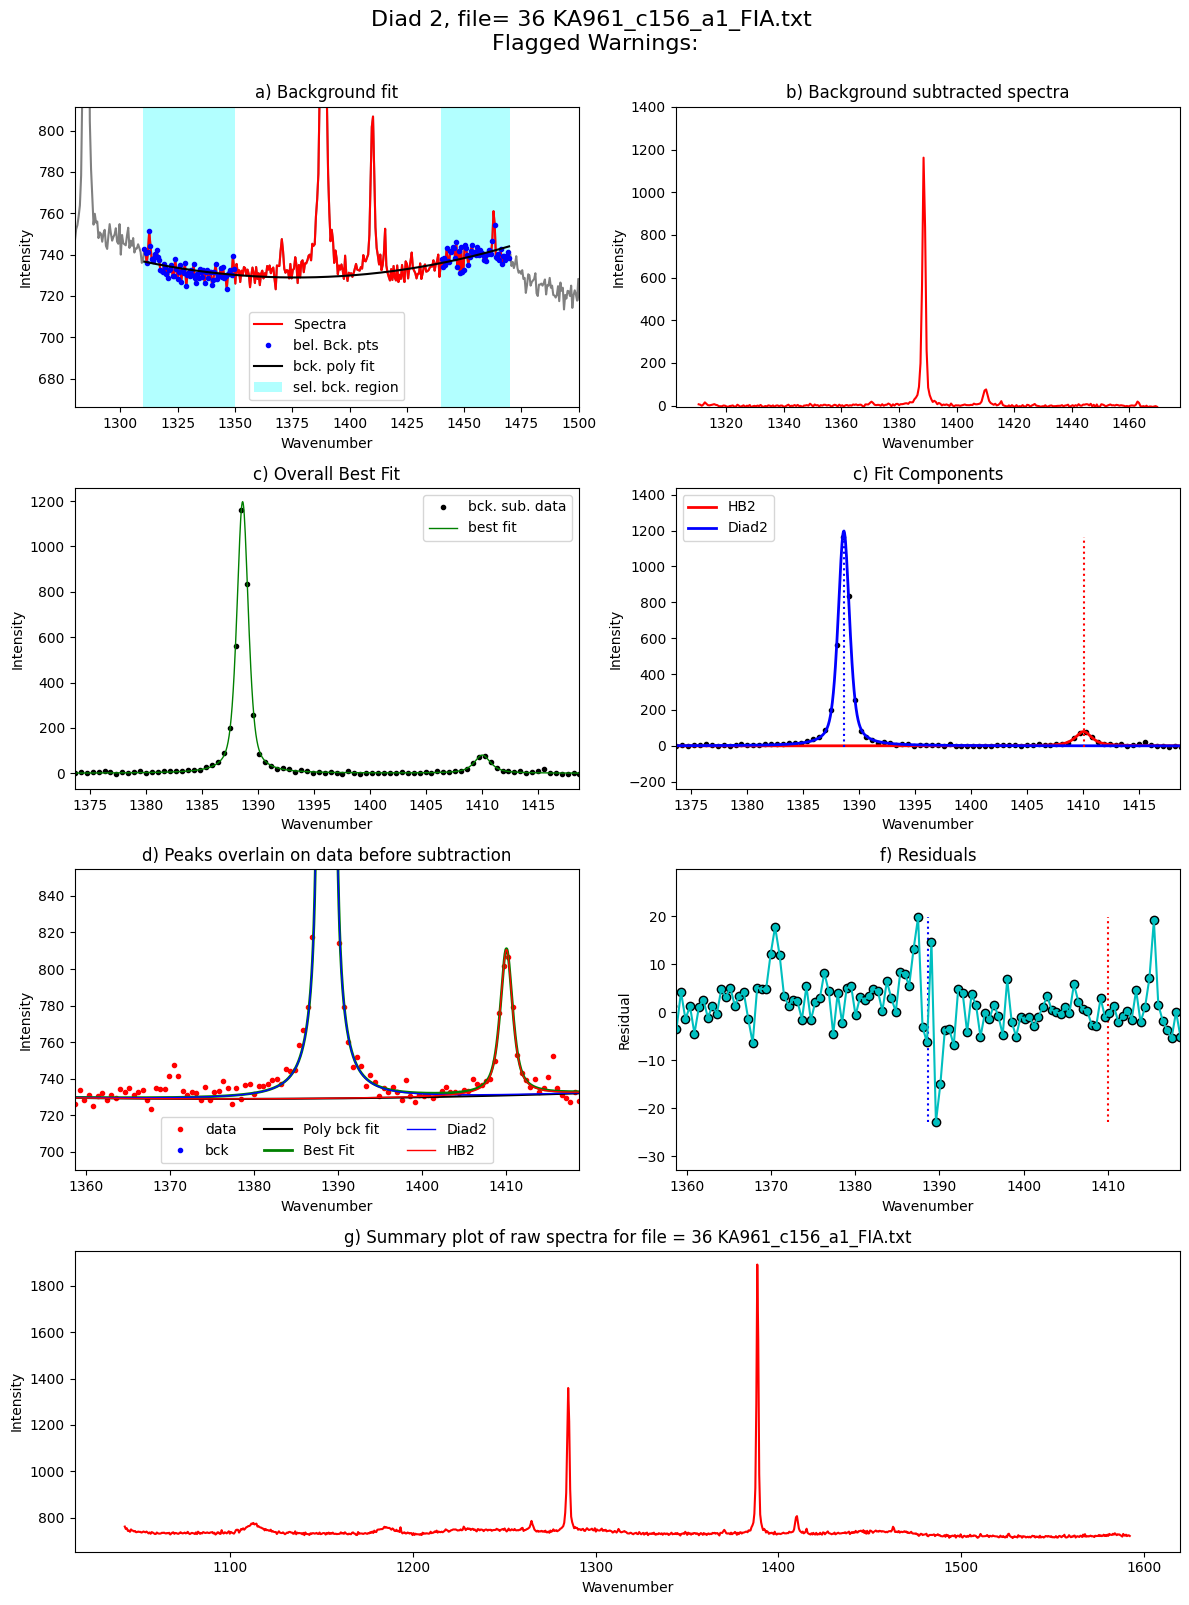

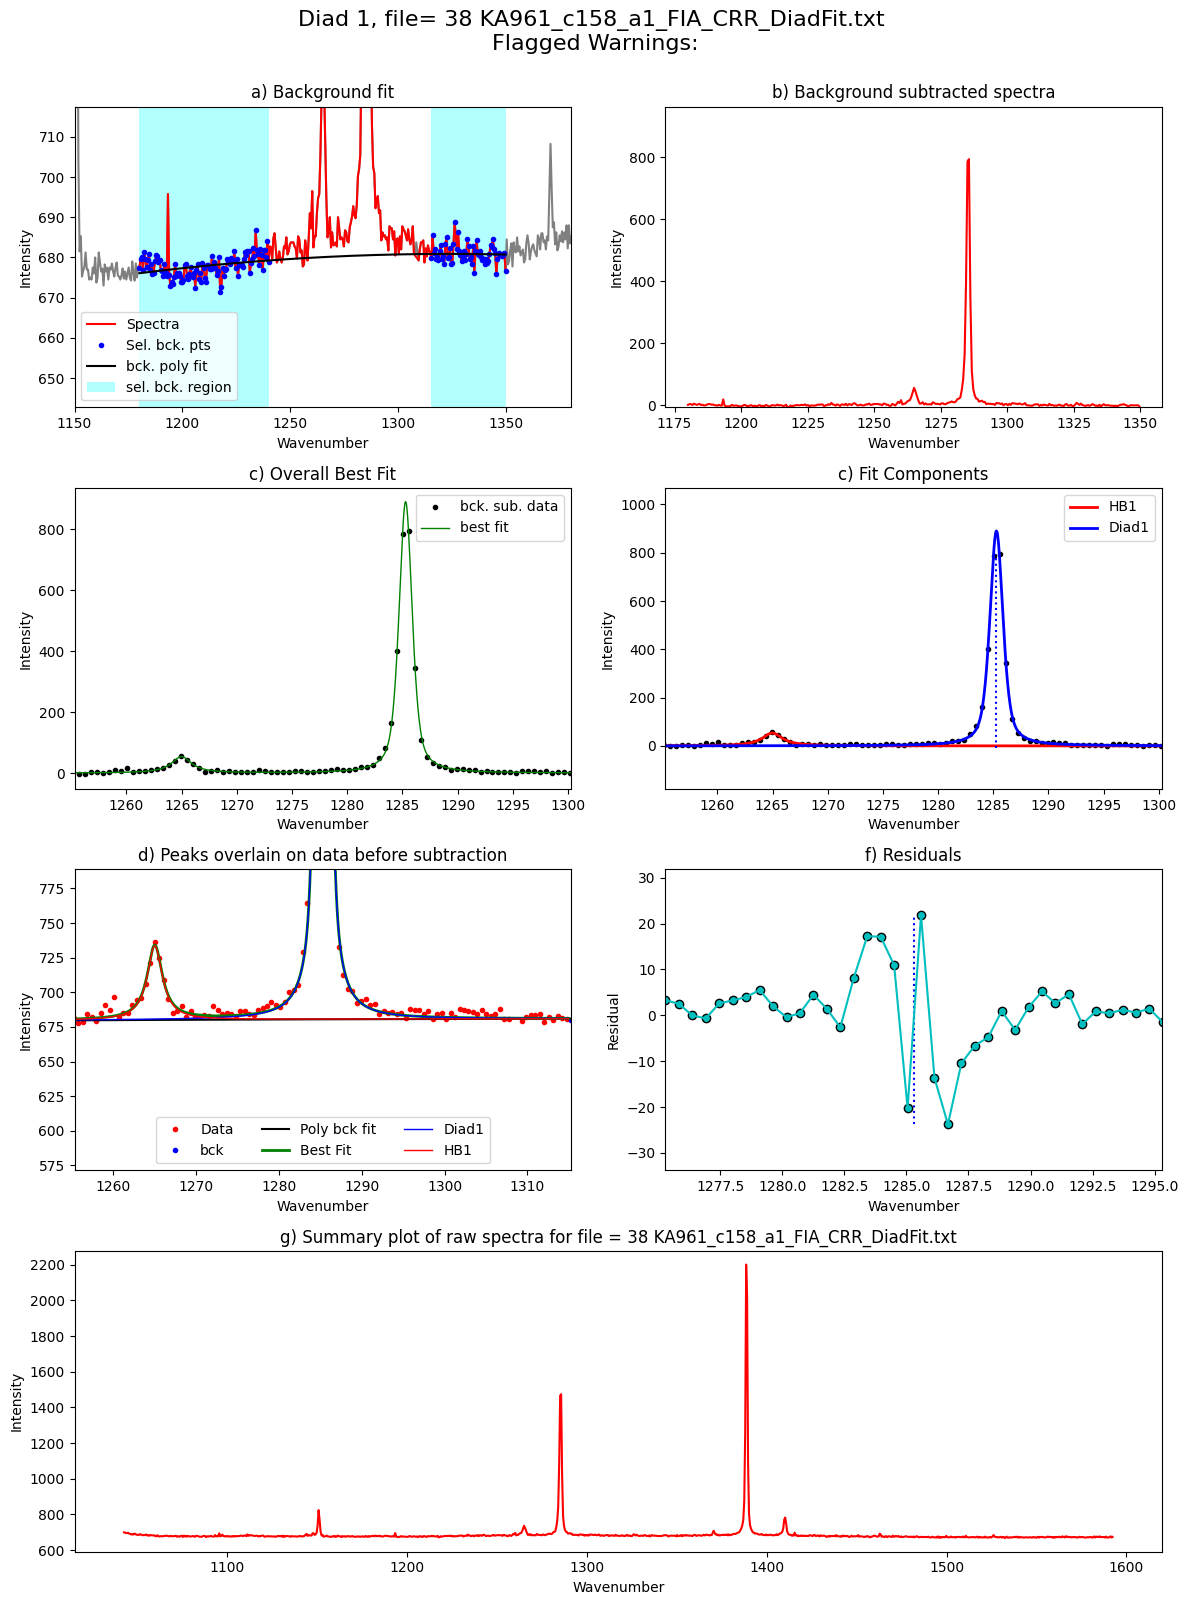

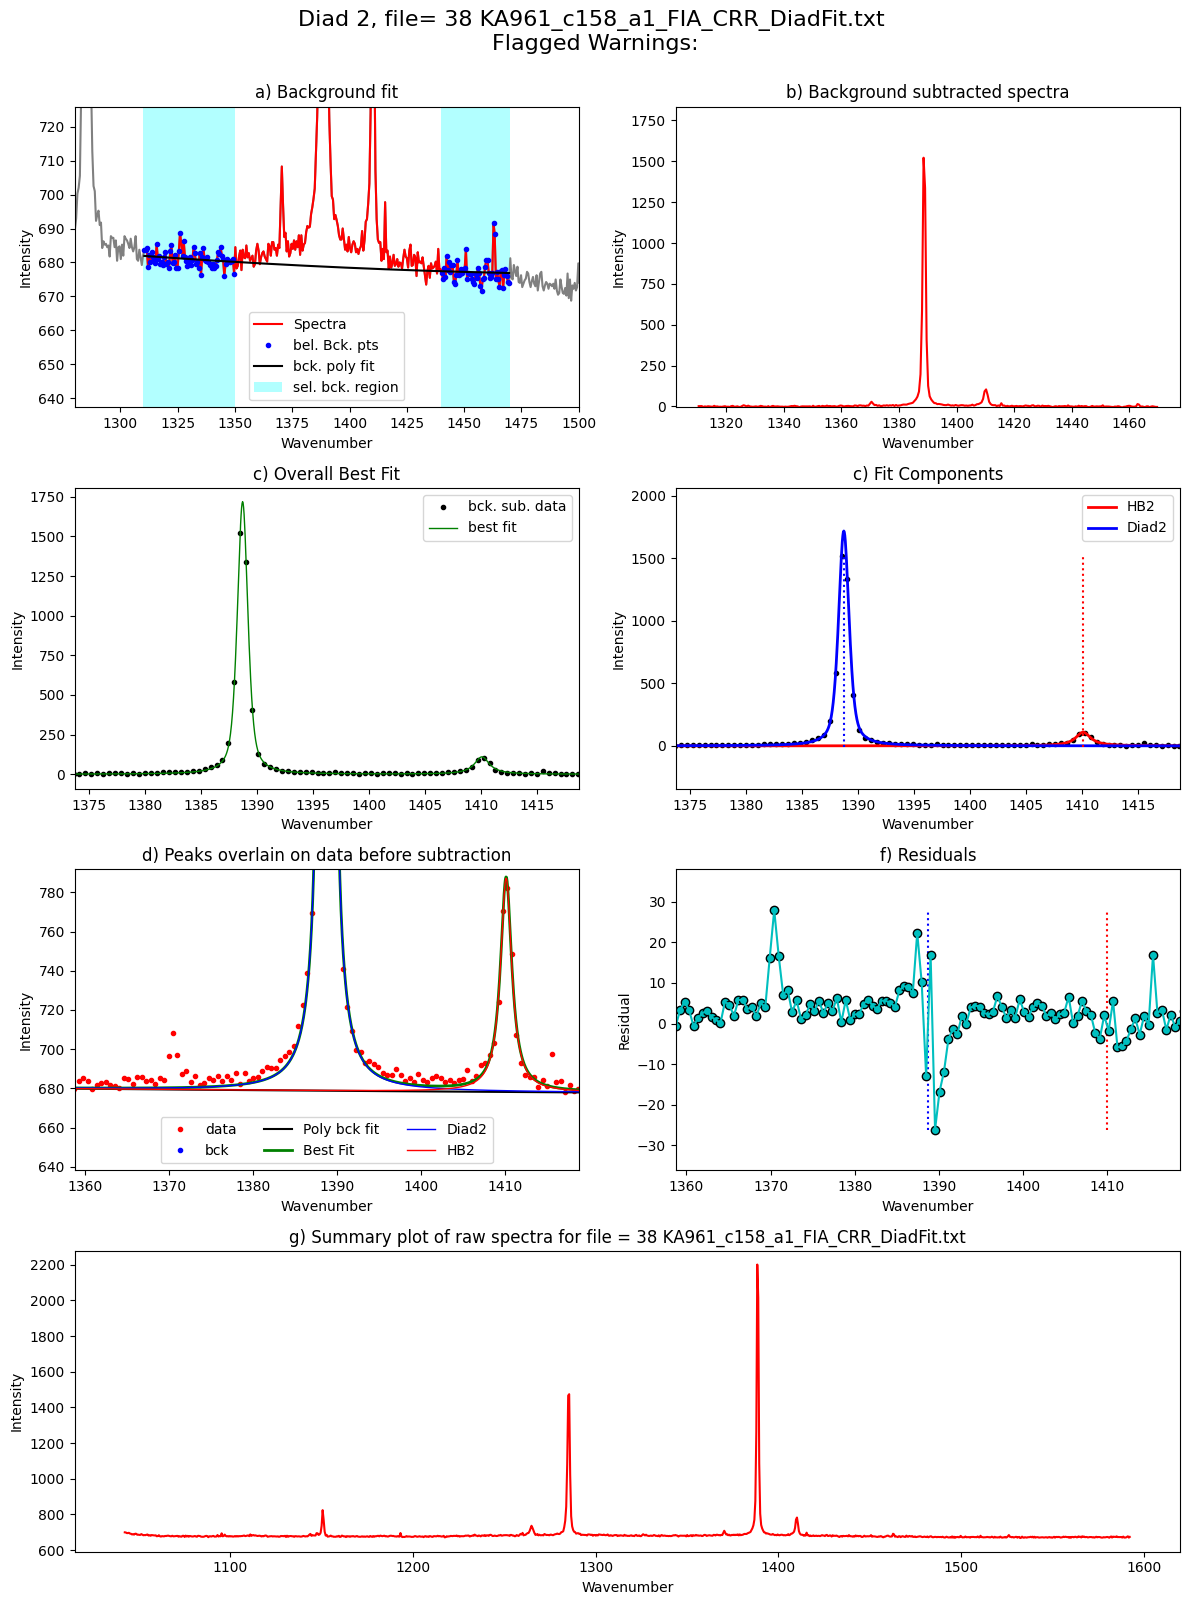

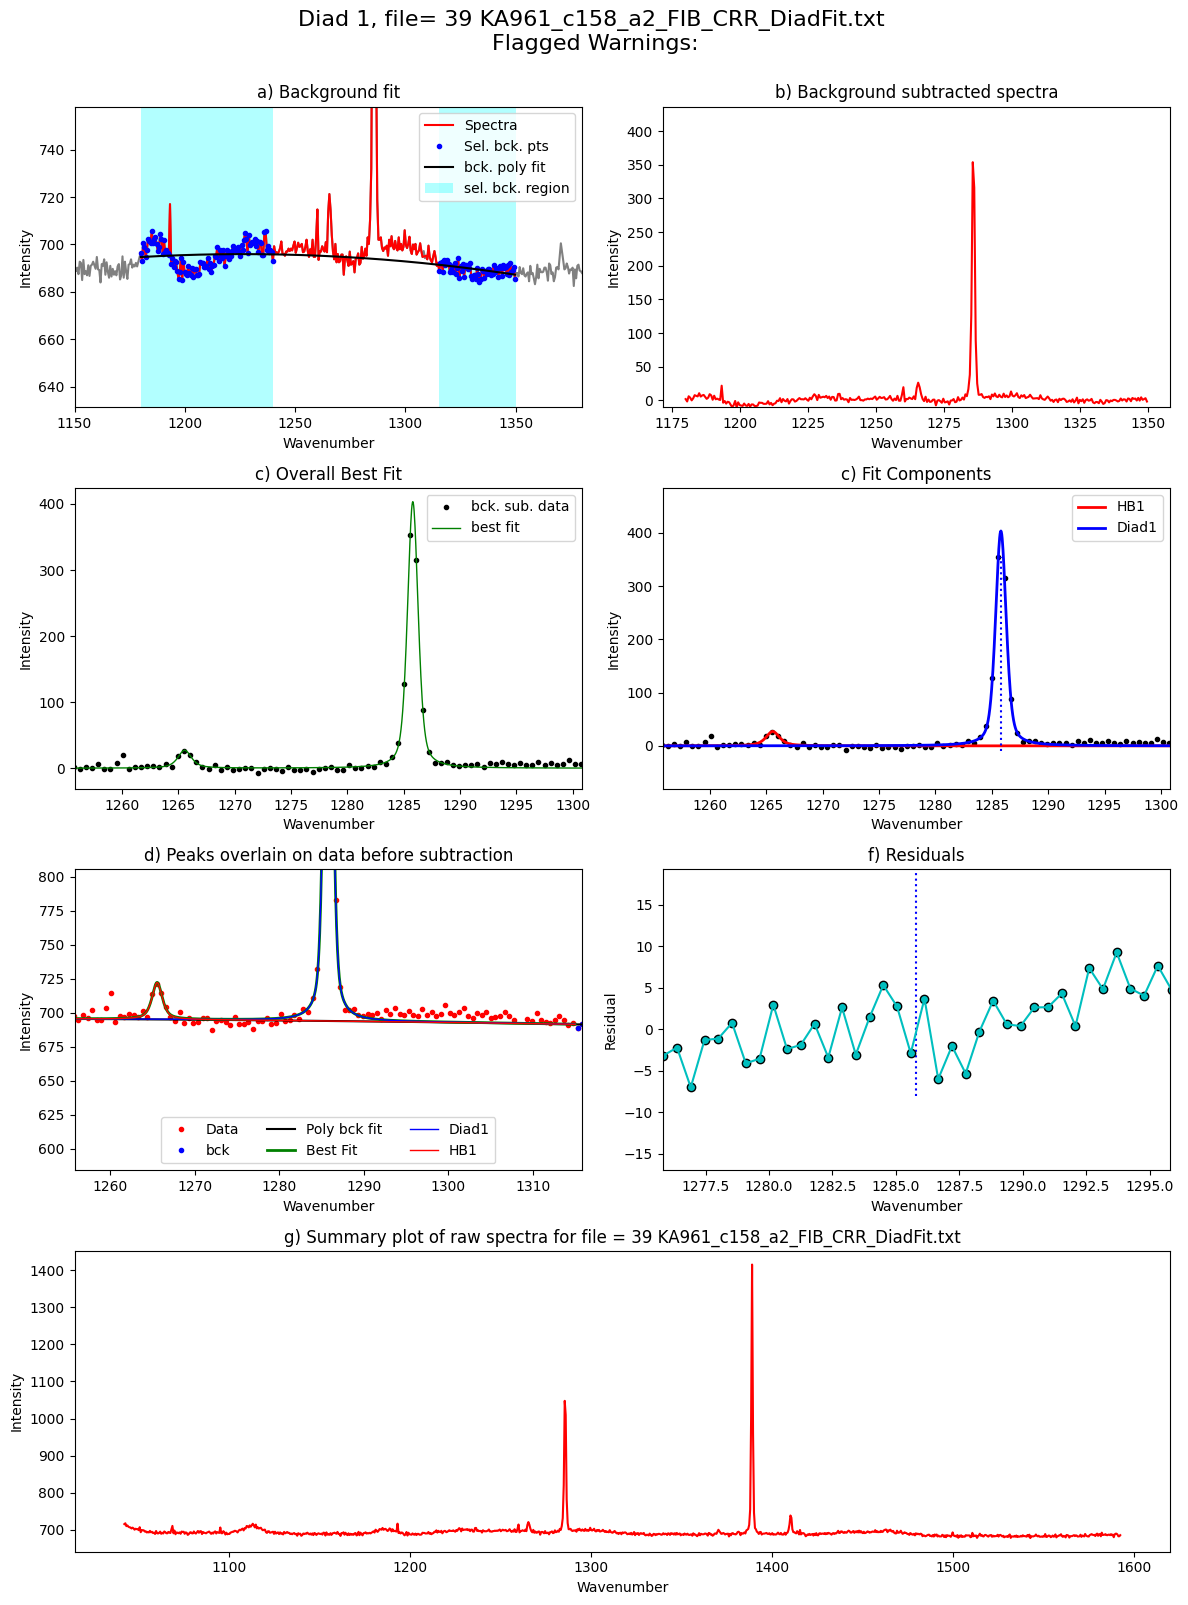

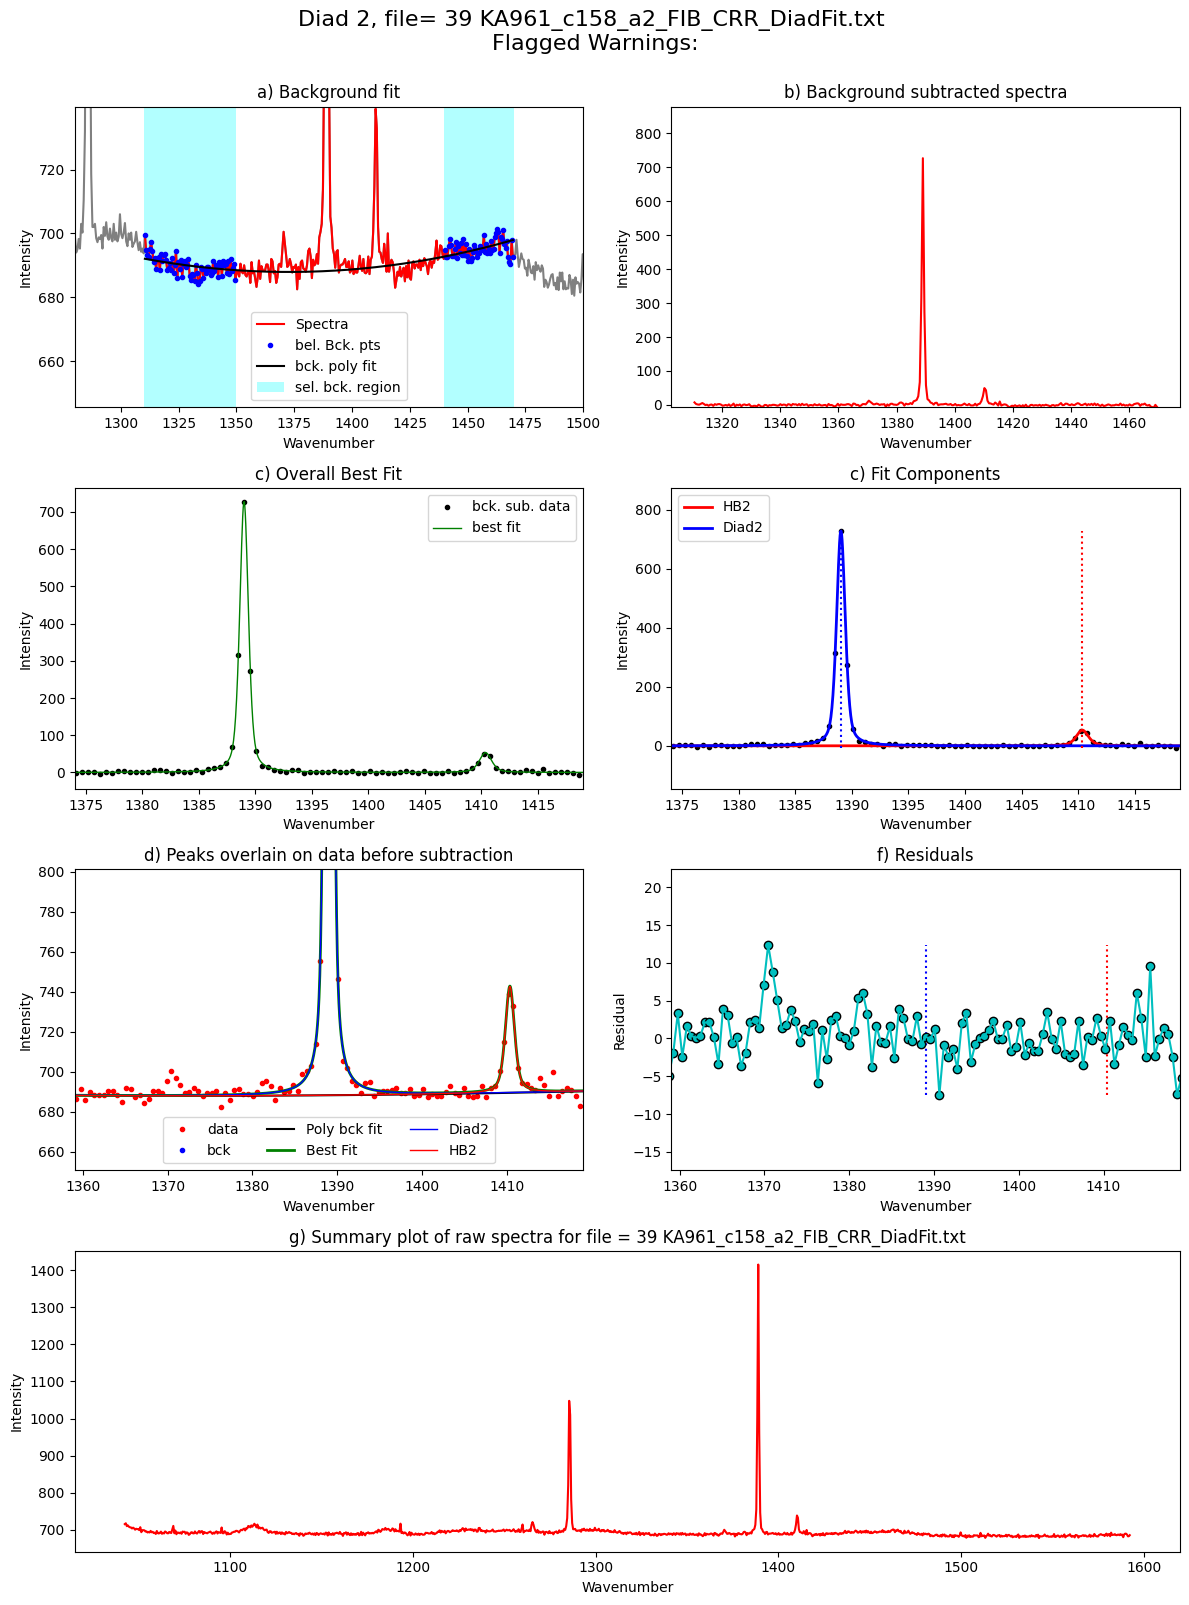

In [43]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [44]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [45]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0               KA961_c110_a1_FIA  103.444257  0.003600          1285.295317   
1               KA961_c110_a1_FIB  103.435020  0.003520          1285.296341   
2               KA961_c111_a1_FIB  104.012241  0.003952          1283.930010   
3               KA961_c111_a1_FIA  104.156255  0.013207          1283.583619   
4               KA961_c111_a1_FIC  104.250674  0.013455          1283.422850   
5   KA961_c113_a1_FIA_CRR_DiadFit  104.066961  0.004503          1283.847600   
6               KA961_c115_a1_FIA  103.354469  0.003887          1285.485822   
7   KA961_c150_a1_FIA_CRR_DiadFit  104.100344  0.007071          1283.719475   
8   KA961_c151_a1_FIA_CRR_DiadFit  103.405615  0.007055          1285.385350   
9               KA961_c152_a1_FIA  103.355749  0.003122          1285.498915   
10  KA961_c153_a1_FIB_CRR_DiadFit  103.533480  0.006637          1285.070114   
11  KA961_c154_a1_FIA_CRR_DiadFit  103.451365  0.004155          1285.280828   
12              KA961_c156_a1_FIA  103.515726  0.008259          1285.102621   
13  KA961_c158_a1_FIA_CRR_DiadFit  103.429267  0.003405          1285.292278   
14  KA961_c158_a2_FIB_CRR_DiadFit  103.213024  0.006666          1285.807448   

    Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0         0.003096             684.756401       1285.295367       1282.401348   
1         0.003114             543.583865       1285.296391       1011.313955   
2         0.003326            1030.900248       1283.930060       2996.550402   
3         0.011619             219.992030       1283.583619        672.325055   
4         0.012191             219.896786       1283.422850        671.947131   
5         0.003742             588.174661       1283.847650       1779.350268   
6         0.003471             461.385329       1285.485872        777.369464   
7         0.006604             490.015276       1283.719525       1437.705506   
8         0.006735             527.244452       1285.385400        931.327900   
9         0.002763             642.956305       1285.498965       1088.017692   
10        0.006327             580.710526       1285.070164       1212.165560   
11        0.003730             508.404149       1285.280878        936.210512   
12        0.007861             632.094005       1285.102671       1288.057283   
13        0.003011             890.453522       1285.292328       1704.785142   
14        0.006266             403.547044       1285.807498        578.908747   

    Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Asym50  Diad1_Asym70  \
0            0.701479        2.607752  ...      1.069712      1.098566   
1            0.689263        1.999296  ...      1.043373      1.086486   
2            1.109232        3.726275  ...      1.159539      1.158580   
3            1.136662        2.324192  ...      1.164782      1.070892   
4            1.118471        2.545069  ...      1.040971      1.019544   
5            1.141712        2.266165  ...      1.090062      1.105791   
6            0.639442        1.859574  ...      1.190883      1.207819   
7            1.101027        3.035702  ...      1.022901      1.034753   
8            0.652424        4.362061  ...      1.174263      1.143689   
9            0.641234        2.316819  ...      1.150418      1.146586   
10           0.782357        3.094353  ...      1.039560      1.122951   
11           0.695881        2.388281  ...      1.057554      1.107273   
12           0.754491        5.416345  ...      1.013216      1.073456   
13           0.708871        3.468625  ...      1.137255      1.177656   
14           0.556872        3.371776  ...      1.062678      1.032328   

   Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  Diad2_Asym50  \
0                   0.097802              0.002049      1.036313   
1                   0.059791              0.002536      1.065527   
2                   0.353932              0.002152      1.

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [46]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()